<a href="https://colab.research.google.com/github/massaoiwanaga/topespsi/blob/main/TESI_VAC_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topicos Especiais em Sistemas de Informação I (MAI701) - Trabalho Final**

---

## **Análise dos dados de vacinação da COVID-19 e seus estabelecimentos de saúde nas regiões norte e sudeste do Brasil**

>*Grupo:*
>
> Alessandra Pierro Saraiva (alessandrapsaraiva@gmail.com)
>
> Fabiane Monteiro Carvalho  (famcrj@gmail.com)
>
> Massao Oliveira Iwanaga (massaoiwanaga@ufrj.br)

In [ ]:
# Testado no ambiente Google Colab - 1.0.0
# Python 3.7.10 
#
# Bibliotecas utilizadas:
#  numpy 1.19.5
#  pandas 1.1.5
#  matplotlib 3.2.2
#  pandas_profiling 1.4.1
#  prov 2.0.0
#  IPython 5.5.0
#
# Repositório com o código disponível em: https://github.com/massaoiwanaga/topespsi
# Datasets usados em: https://drive.google.com/drive/folders/16LuaTdN1iDFMuEOTJhDhiGNgVg1Dhi5r?usp=sharing

# 1) Preparação do ambiente

## 1.1) Importação das biblioteca usadas no trabalho

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

## 1.2) Instalação das bibliotecas PROV e Unicode

In [2]:
#Essa biblioteca implementa em Python o Modelo de Dados PROV da W3C
!pip install prov

     |████████████████████████████████| 430kB 6.5MB/s 
     |████████████████████████████████| 235kB 10.4MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 


In [3]:
#Essa biblioteca é usada para remover acentos de caracteres existentes no dataset
!pip install unicode

## 1.3) Configuração de acesso aos dados do Google Drive

In [68]:
# Se está executando o notebook no Google Colab, é necessário montar o drive para o ambiente virtual do Google Drive
# Segundo esta implementação, os datasets devem estar armazenados no Google Drive. Nele também será gravado o grafo de proveniência

# Clicar no link que aparecerá e será gerada uma chave, que deverá ser colada no campo "Autorization code"
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1.4) Definição das variáveis gerais

In [69]:
UFs = ['RJ', 'SP','MG', 'ES', 'AM', 'AC', 'AP', 'PA', 'RO', 'RR', 'TO']
#Norte = ['AM', 'AC', 'AP', 'PA', 'RO', 'RR', 'TO']
#Sudeste = ['RJ', 'SP','MG', 'ES']
ranges_idade = [0,10,20,30,40,50,60,70,80,90,100,300]

# 2) Definição das informações de proveniência

## 2.1) Realizando as importações

In [6]:
# Trabalhando com a bibliotaca PROV

import sys, subprocess, datetime, random
from prov.model import ProvDocument #PROV Library


## 2.2) Definição das variáveis de proveniência

In [ ]:
#agent    = input("Enter the name of the AGENT WHO is running the program: ")

graph = 'Provenance_graph'
agent    = 'Alessandra-Fabiane-Massao'
entity   = 'Vacinação'
entity2   = 'CNES'
entity3 = 'Regiões_Metropolitanas'
activity1 = 'Importação_e_leitura'
activity2 = 'Limpeza_dos_dados'
activity3 = 'Tratamento_dos_dados'
activity4 = 'Criação_dos_gráficos'
activity5 = 'Visualização_Análise_dos_dados'

## 2.3) Registro retrospectivo da proveniência

In [ ]:
# Criando documento de proveniência em branco
d1 = ProvDocument()                                                 

# Declarando namespaces para os prefixos usados na execução do experimento
d1.add_namespace('dados.gov.br', 'https://dados.gov.br/dataset/covid-19-vacinacao/')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('greco', 'http://www.ufrj.br/ppgi/greco/#')
d1.add_namespace('dados.gov.br', 'https://dados.gov.br/dataset/cnes_ativo')
d1.add_namespace('ibge.gov.br', 'https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/18354-regioes-metropolitanas-aglomeracoes-urbanas-e-regioes-integradas-de-desenvolvimento.html?=&t=downloads')

# Adicionando entidades
entity = "dados.gov.br:"+ entity
e1 = d1.entity(entity)
entity2 = "dados.gov.br:"+ entity2
e2 = d1.entity(entity2)
entity3 = "ibge.gov.br:"+ entity3
e3 = d1.entity(entity3)

# Aicionando o agente
agent = "foaf:"+ agent
d1.agent(agent)

# Atribuindo a execução do experimento ao PROV-Agent
d1.wasAttributedTo(e1, agent)
d1.wasAttributedTo(e2, agent)
d1.wasAttributedTo(e3, agent)

# Adicionando atividades
activity1 = "greco:"+ activity1
d1.activity(activity1)
activity2 = "greco:"+ activity2
d1.activity(activity2)
activity3 = "greco:"+ activity3
d1.activity(activity3)
activity4 = "greco:"+ activity4
d1.activity(activity4)
activity5 = "greco:"+ activity5
d1.activity(activity5)

# Geração
d1.wasGeneratedBy( entity, activity1)
d1.wasGeneratedBy( entity2, activity1)
d1.wasGeneratedBy( entity3, activity1)
d1.wasGeneratedBy( entity, activity2)
d1.wasGeneratedBy( entity2, activity2)
d1.wasGeneratedBy( entity3, activity2)
d1.wasGeneratedBy( entity, activity3)
d1.wasGeneratedBy( entity2, activity3)
d1.wasGeneratedBy( entity3, activity3)
d1.wasGeneratedBy( entity, activity4)
d1.wasGeneratedBy( entity2, activity4)
d1.wasGeneratedBy( entity3, activity4)
d1.wasGeneratedBy( entity, activity5)
d1.wasGeneratedBy( entity2, activity5)
d1.wasGeneratedBy( entity3, activity5)

# Adicionando um papel (role) ao PROV-Agent e um timestamp ao dataset
d1.agent(agent, {'prov:hadRole': 'Executor', 'foaf:mbox': 'grupo_6@ufrj.br', 'prov:attributedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity2, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity3, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})

d1.entity(entity, {'prov:location':'https://dados.gov.br/dataset/covid-19-vacinacao'})
d1.entity(entity2, {'prov:location':'https://dados.gov.br/dataset/cnes_ativo'})
d1.entity(entity3, {'prov:location':'https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/18354-regioes-metropolitanas-aglomeracoes-urbanas-e-regioes-integradas-de-desenvolvimento.html?=&t=downloads'})

d1.entity(entity, {'prov:records':'7.908.949'})
d1.entity(entity2, {'prov:records':'354.805'})
d1.entity(entity3, {'prov:records':'349'})

<ProvEntity: ibge.gov.br:Regiões_Metropolitanas>

## 2.4) Geração do Grafo de Proveniência no output

In [ ]:
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
graph = graph +".png"
dot.write_png('/content/drive/My Drive/TESI_FCD/'+graph)

## 2.5) Geração da serialização - output XML e output Turtle

In [ ]:
#Generating the Serialization - Output XML
d1.serialize(entity + ".xml", format='xml') 
d1.serialize(entity2 + ".xml", format='xml') 
d1.serialize(entity3 + ".xml", format='xml') 

#Generating the Serialization - Output Turtle
d1.serialize(entity + ".ttl", format='rdf', rdf_format='ttl') 
d1.serialize(entity2 + ".ttl", format='rdf', rdf_format='ttl') 
d1.serialize(entity3 + ".ttl", format='rdf', rdf_format='ttl') 

## 2.6) Geração do output do documento de proveniência

In [ ]:
print ('')
print ('simple provenance doc')
print(d1.get_provn())
print ('')


simple provenance doc
document
  prefix dados.gov.br <https://dados.gov.br/dataset/covid-19-vacinacao/>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix greco <http://www.ufrj.br/ppgi/greco/#>
  prefix dados.gov.br_1 <https://dados.gov.br/dataset/cnes_ativo>
  prefix ibge.gov.br <https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/18354-regioes-metropolitanas-aglomeracoes-urbanas-e-regioes-integradas-de-desenvolvimento.html?=&t=downloads>
  
  entity(dados.gov.br:Vacinação)
  entity(dados.gov.br:CNES)
  entity(ibge.gov.br:Regiões_Metropolitanas)
  agent(foaf:Alessandra-Fabiane-Massao)
  wasAttributedTo(dados.gov.br:Vacinação, foaf:Alessandra-Fabiane-Massao)
  wasAttributedTo(dados.gov.br:CNES, foaf:Alessandra-Fabiane-Massao)
  wasAttributedTo(ibge.gov.br:Regiões_Metropolitanas, foaf:Alessandra-Fabiane-Massao)
  activity(greco:Importação_e_leitura, -, -)
  activity(greco:Limpeza_dos_dados, -, -)
  activity(greco:Tratamento_dos_dados, -, -)
  activity(

## 2.7) Geração da serialização - output JSON

In [ ]:
print ('')
print ('simple provenance JSON')
print(d1.serialize(indent=2))
print('')


simple provenance JSON
{
  "prefix": {
    "dados.gov.br": "https://dados.gov.br/dataset/covid-19-vacinacao/",
    "foaf": "http://xmlns.com/foaf/0.1/",
    "greco": "http://www.ufrj.br/ppgi/greco/#",
    "dados.gov.br_1": "https://dados.gov.br/dataset/cnes_ativo",
    "ibge.gov.br": "https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/18354-regioes-metropolitanas-aglomeracoes-urbanas-e-regioes-integradas-de-desenvolvimento.html?=&t=downloads"
  },
  "entity": {
    "dados.gov.br:Vacina\u00e7\u00e3o": [
      {},
      {
        "prov:generatedAtTime": "2021-05-19 21:29:54.006542"
      },
      {
        "prov:location": "https://dados.gov.br/dataset/covid-19-vacinacao"
      },
      {
        "prov:records": "7.908.949"
      }
    ],
    "dados.gov.br:CNES": [
      {},
      {
        "prov:generatedAtTime": "2021-05-19 21:29:54.006593"
      },
      {
        "prov:location": "https://dados.gov.br/dataset/cnes_ativo"
      },
      {
        "pro

## 2.8) Adicionando a visualização ao gráfico de proveniência

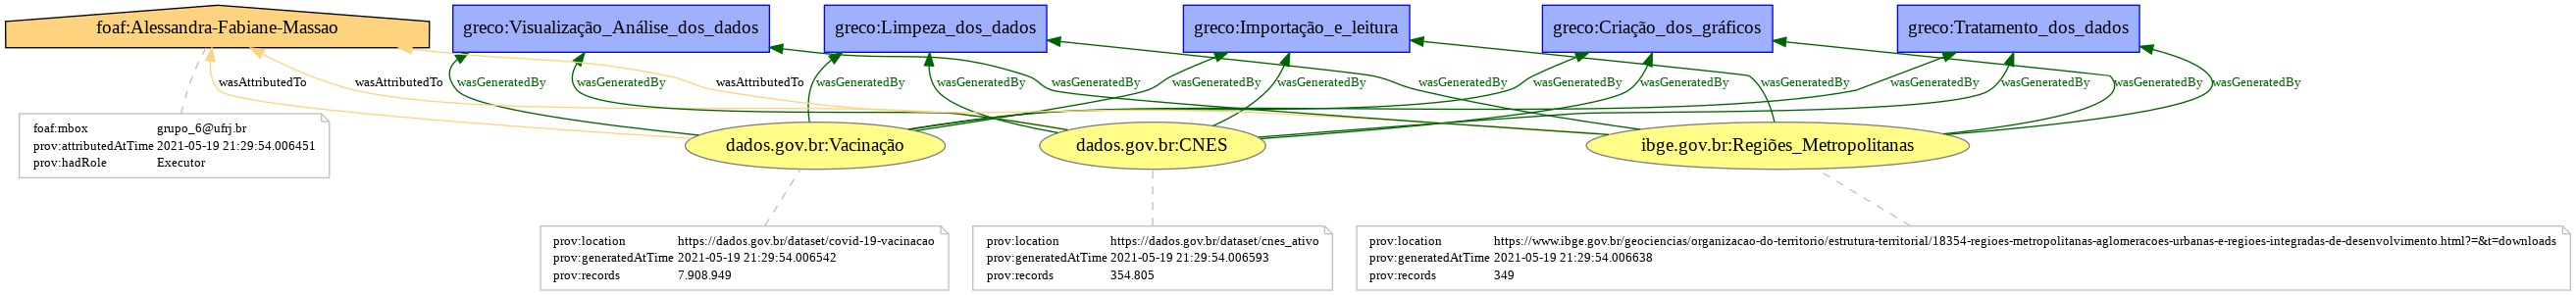

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/TESI_FCD/'+graph)

# 3) Preparação dos datasets e dataframes

## 3.1) Importação e tratamento do dataset de vacinação

In [70]:
# Salve o dataset de vacinação no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_vacinacao = pd.read_csv('/content/drive/My Drive/TESI_FCD/part-00000-090405dc-80c4-4889-84c3-a9a390d06947-c000.csv',delimiter=',')

### Exploração inicial do DataSet de Vacinação

In [8]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset
print('')
print(df_vacinacao.info())  # Informações sobre o dataset 

# Observe o total de linhas (7908949) e o total de colunas (33) do dataset

Total de registros: 7908949

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7908949 entries, 0 to 7908948
Data columns (total 33 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         float64
 8   paciente_endereco_coPais                  float64
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     float64
 13  paciente_nacionalidade_enumN

In [ ]:
df_vacinacao.head(5)        # Visualização dos registros iniciais

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
0,60aeb975-94ed-4113-a8b0-ac55dbb8ab41-i0b0,433768b2c569be2ff29976dea5cddd0eeb907de38c254e...,79.0,1942-01-28,F,1.0,BRANCA,432225.0,10.0,TUPANDI,BRASIL,RS,95775.0,B,2227428,PREFEITURA MUNICIPAL DE SAO SEBASTIAO DO CAI,CENTRO DE SAUDE DR BRUNO CASSEL,431950.0,SAO SEBASTIAO DO CAI,RS,301,Pessoas de 60 nos ou mais Institucionalizadas,3.0,Pessoas de 60 anos ou mais institucionalizadas,210018A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-16T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 03:20:03
1,b68c468e-8083-4cca-8da1-ea9a8decbaba-i0b0,8499ef2ad9174cee4bd4dac8ae172a706775f4c835cb17...,90.0,1930-09-11,M,2.0,PRETA,430930.0,10.0,GUAIBA,BRASIL,RS,92500.0,B,2225999,PREFEITURA MUNICIPAL DE GUAIBA,UNIDADE BASICA DE SAUDE COHAB,430930.0,GUAIBA,RS,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,210018A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-11T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 16:04:01
2,db74d38d-be6e-4b1a-82d0-e2797c3b55e7-i0b0,1c8b855733d6ea88081712bd74f95ca36bef67ac83b168...,91.0,1929-06-25,F,1.0,BRANCA,316900.0,10.0,TOCANTINS,BRASIL,MG,36512.0,B,2162776,PREFEITURA MUNICIPAL DE TOCANTINS,CENTRO INTEGRADO DE SAUDE DE TOCANTINS,316900.0,TOCANTINS,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-12T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-15 19:32:10
3,2126698b-2d68-4559-afbd-2cfb665319d8-i0b0,b89cbe103ef31b4bbe4b101e56ad1c3f97a8772a9e440c...,81.0,1939-04-14,F,1.0,BRANCA,240800.0,10.0,MOSSORO,BRASIL,RN,59609.0,B,7172605,PREFEITURA MUNICIPAL DE MOSSORO,UBS DR FRANCISCO NAZARENO P GURGEL,240800.0,MOSSORO,RN,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,NaN,2021-02-19T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-02-20 03:36:33
4,58479a85-603d-4167-898d-e638b4204cc3-i0b0,9a8ae778fc10f5382ce36f1ffb538be3e0df908dd64498...,27.0,1993-12-30,F,1.0,BRANCA,350850.0,10.0,CACAPAVA,BRASIL,SP,12290.0,B,6426247,UNIMED DE CACAPAVA COOPERATIVA DE TRABALHO MEDICO,HOSPITAL UNIMED DE CACAPAVA,350850.0,CACAPAVA,SP,926,Outros,9.0,Trabalhadores de Saúde,200278,Sinovac,NaN,2021-02-04T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,VACIVIDA,2021-02-04 06:02:43


### Avaliação das datas de vacinação

In [ ]:
# Avaliação das datas de vacinação
print(df_vacinacao.vacina_dataAplicacao.min()) # Data mínima informada
print(df_vacinacao.vacina_dataAplicacao.max()) # Data máxima informada

1923-06-02T00:00:00.000Z
2021-10-20T00:00:00.000Z


In [ ]:
# Como a vacinação iniciou-se em 17/01/21, qualquer registro de vacinação anterior a esta data, indica erro de cadastro
# Da mesma forma, qualquer registro de vacinação após a data de obtenção do arquivo de vacinados, também indica erro de cadastro

# Criação de dataset apenas com datas de vacinação fora do periodo esperado.
# Incluiu-se alguns dias do mês de março no dataset para se observar o cadastro de vacinas desses dias, o que deveria ocorrer

from datetime import date, timedelta
data_vacina = df_vacinacao[(pd.to_datetime(df_vacinacao.vacina_dataAplicacao) > '2021-03-01') | (pd.to_datetime(df_vacinacao.vacina_dataAplicacao) < '2021-01-17')]

# Como esperado, as datas mínimas e máximas continuam as mesmas do dataset original
print(data_vacina.vacina_dataAplicacao.min()) 
print(data_vacina.vacina_dataAplicacao.max())

1923-06-02T00:00:00.000Z
2021-10-20T00:00:00.000Z


In [ ]:
data_vacina.vacina_dataAplicacao.value_counts()

# Na listagem abaixo,  
# Observa-se quantidade de vacinas registradas entre os dias 01 e o dia 03/03/21, conforme já esperado, confirmando-se então que o dataset possui os dados de vacinação até o dia 03/03/2021.
# A única data posterior a 03/03/21 é a data de vacinação em 20/10/21 (no futuro), com apenas uma dose registrada, o que indica fortemente erro de cadastro.

# Todas as demais datas de vacinação anteriores a 17/01/2021 apresentam volume muito pequeno de vacinados. 
# Essa exploração inicial serviu para conhecer as informações referentes às datas de vacinação do dataset. Como a informação da data de vacinação não será utilizada nas análises
# que atendem ao objetivo deste trabalho, optou-se por não excluir esses registros.

2021-03-02T00:00:00.000Z    111392
2021-03-01T03:00:00.000Z    110183
2021-03-02T03:00:00.000Z     92191
2021-03-03T00:00:00.000Z     48612
2021-03-03T03:00:00.000Z     26532
2021-01-12T00:00:00.000Z        28
2021-01-04T00:00:00.000Z        26
2021-01-02T00:00:00.000Z        26
2020-12-21T00:00:00.000Z        14
2021-01-15T00:00:00.000Z        10
2021-01-05T00:00:00.000Z        10
2021-01-11T00:00:00.000Z         7
2021-01-01T00:00:00.000Z         7
2021-01-03T00:00:00.000Z         6
2021-01-06T00:00:00.000Z         3
2021-01-08T00:00:00.000Z         3
2020-12-22T00:00:00.000Z         2
2021-01-16T00:00:00.000Z         1
2020-01-28T00:00:00.000Z         1
2020-12-20T00:00:00.000Z         1
2020-12-28T00:00:00.000Z         1
2020-01-20T00:00:00.000Z         1
1923-06-02T00:00:00.000Z         1
2021-10-20T00:00:00.000Z         1
1988-03-26T00:00:00.000Z         1
1979-01-22T00:00:00.000Z         1
2020-12-29T00:00:00.000Z         1
1971-01-29T00:00:00.000Z         1
2020-12-27T00:00:00.

### Eliminação de colunas e linhas que não serão utilizadas - dataset de vacinação

In [71]:
# Eliminação das colunas que não serão utilizadas nas análises

df_vacinacao = df_vacinacao.drop(['paciente_endereco_cep','estabelecimento_razaoSocial','estalecimento_noFantasia','vacina_lote','vacina_fabricante_referencia',
                                  'vacina_codigo','sistema_origem'],axis=1)

In [72]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe
# Eliminando os estados que não são da região norte nem sudeste

df_vacinacao = df_vacinacao.loc[(df_vacinacao['estabelecimento_uf'].isin(UFs))]

In [73]:
# Verificação do número de valores existentes para a coluna 'vacina_descricao_dose'

df_vacinacao['vacina_descricao_dose'].value_counts()

    1ª Dose    3529642
    2ª Dose    1006498
    Dose            29
Name: vacina_descricao_dose, dtype: int64

In [74]:
# Para o trabalho, só interessam as pessoas que tomaram a primeira dose da vacina, portanto, serão eliminados do dataframe as linhas que não
# se referem à primeira dose da vacinação

df_vacinacao = df_vacinacao.loc[(df_vacinacao['vacina_descricao_dose'].str.strip().str[0] =='1')]

In [10]:
# Código reprodutível
# Quantidade de registros do dataset após eliminação de registros que não se referem à primeira dose
assert len(df_vacinacao) == 3529642

In [15]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset após eliminação de linhas

print('')
print(df_vacinacao.info())                        # Informações sobre o dataset

## É possível observar a redução do número total de linhas (3529642) e do número total de colunas (26) do dataset

Total de registros: 3529642

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3529642 entries, 2 to 7908948
Data columns (total 26 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         float64
 8   paciente_endereco_coPais                  float64
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_nacionalidade_enumNacionalidade  object 
 13  estabelecimento_valor       

### Identificação e tratamento de valores duplicados

#### Identificando valores duplicados e entendimento de suas características

In [76]:
#Lista todos os registros em que o "paciente_id" apareça mais de 2 vezes
duplicados_mais2 = df_vacinacao[df_vacinacao['paciente_id'].isin(df_vacinacao['paciente_id'].value_counts()[df_vacinacao['paciente_id'].value_counts()>2].index)].sort_values(by=["paciente_id"])

#Lista todos os registros em que o "paciente_id" apareça 2 ou mais vezes
duplicados = df_vacinacao[df_vacinacao.duplicated(subset=['paciente_id'], keep=False)].sort_values(by=["paciente_id"])

In [77]:
# Lista os estabelecimentos duplicados por estado de vacinação

#Pode-se observar que todos os estados possuem casos de duplicação de registros de vacinação para uma mesma pessoa
duplicados['estabelecimento_uf'].value_counts()

SP    48717
RJ     8676
MG     3280
AM     1008
PA      776
ES      355
AP      314
TO      258
AC      106
RR       53
RO       18
Name: estabelecimento_uf, dtype: int64

In [78]:
# Quantos são os que tem mais de dois registros duplicados e listagem dos primeiros casos
print(len(duplicados_mais2))
duplicados_mais2.head(10)

129


,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds
4828100,56834bab-f0c1-486b-b309-db6076eb4b3b-i0b0,0c3390b4d0b9a535cb22799c2618053106a61deff30b85...,71.0,1949-06-14,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-23T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-26 18:23:18
3670249,4e09a541-fa26-4daa-8983-2ab84668a1e2-i0b0,0c3390b4d0b9a535cb22799c2618053106a61deff30b85...,71.0,1949-06-14,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-23T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-26 19:18:09
356327,ae5f43ff-7839-4851-b3f2-2183cb62d729-i0b0,0c3390b4d0b9a535cb22799c2618053106a61deff30b85...,71.0,1949-06-14,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-23T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-24 21:45:21
4773242,7f53f141-1d9c-4bcd-8d24-504b67d4ea50-i0b0,0fc334df6e1b34ea25366709ab808fd731e4f9f1c02347...,33.0,1987-08-15,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-22T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-26 18:35:10
1842150,11e92ee3-af7c-46c1-9096-e25235864e32-i0b0,0fc334df6e1b34ea25366709ab808fd731e4f9f1c02347...,33.0,1987-08-15,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-22T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-24 21:17:26
6830377,7d66212c-9a74-4ebe-ba99-4be3e2a79a43-i0b0,0fc334df6e1b34ea25366709ab808fd731e4f9f1c02347...,33.0,1987-08-15,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-22T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-26 19:20:49
4952193,099ddc6f-f845-472a-9f5d-d31cdf6a3545-i0b0,14a64e6664224570bf41963ca5de7bf3a9190cfa6bc507...,91.0,1929-10-24,F,3.0,PARDA,314610.0,10.0,OURO PRETO,BRASIL,MG,B,2213737,314610.0,OURO PRETO,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,SERUM INSTITUTE OF INDIA LTD,2021-02-18T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-20 01:50:43
7816317,3761145f-9f01-414a-803f-adec2e8dd0c4-i0b0,14a64e6664224570bf41963ca5de7bf3a9190cfa6bc507...,91.0,1929-10-24,F,3.0,PARDA,314610.0,10.0,OURO PRETO,BRASIL,MG,B,2213737,314610.0,OURO PRETO,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,SERUM INSTITUTE OF INDIA LTD,2021-02-18T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:34:49
3602192,344704ba-0ed3-4cfe-b4f7-0f112cef3a8f-i0b0,14a64e6664224570bf41963ca5de7bf3a9190cfa6bc507...,91.0,1929-10-24,F,3.0,PARDA,314610.0,10.0,OURO PRETO,BRASIL,MG,B,2163438,314610.0,OURO PRETO,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-18T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-25 13:38:14
290660,5ad1dcd0-5094-45f0-8b52-db07c9d12e41-i0b0,1c4c428b27e9a765319f65ded55e7c17124eec57ee0e9e...,44.0,1976-02-26,M,4.0,AMARELA,150060.0,10.0,ALTAMIRA,BRASIL,PA,B,2330385,150060.0,ALTAMIRA,PA,926,Outros,9.0,Trabalhadores de Saúde,F

#### Tratamento de linhas duplicadas

In [79]:
# Existe mais de um registro de vacinação da primeira dose para um mesmo paciente
# Será mantido o registro com data de aplicação da vacina mais antiga

# O parâmetro inplace=True indica que o dataframe ficará doravante ordenado por "paciente_id", "vacina_dataAplicacao"
df_vacinacao.sort_values(by=["paciente_id", "vacina_dataAplicacao"], inplace=True)

In [80]:
# Verifica quantos registros contém o campo 'paciente_id' em duplicidade
# Não considera a primeira ocorrência como duplicada

df_vacinacao.duplicated(subset=['paciente_id']).value_counts()

False    3497840
True       31802
dtype: int64

In [81]:
# Mantém a primeira ocorrência e elimina as demais linhas de mesmo paciente_id
# O parâmetro inplace=True persiste o resultado da operação ao dataframe "df_vacinacao"
df_vacinacao.drop_duplicates(subset=['paciente_id'], keep='first', inplace=True)

# O resultado esperado do comando abaixo é a ausência de valores "True", já que todos serão "False" (não duplicados)
df_vacinacao.duplicated(subset=['paciente_id']).value_counts()

False    3497840
dtype: int64

In [82]:
# Código reprodutível
# Quantidade total de registros do dataset após eliminação das colunas duplicadas
assert len(df_vacinacao) == 3497840

In [83]:
# Código reprodutível
# Validação em relaçao ao valor médio da coluna paciente_idade 
assert format(df_vacinacao.paciente_idade.mean(), '.2f') == '57.67'

### Tratamento de valores nulos e/ou faltantes

In [19]:
df_vacinacao.count()  # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      # tratamento de dados se essas colunas forem necessárias para análise

document_id                                 3497840
paciente_id                                 3497840
paciente_idade                              3497840
paciente_dataNascimento                     3497840
paciente_enumSexoBiologico                  3497840
paciente_racaCor_codigo                     3497840
paciente_racaCor_valor                      3497840
paciente_endereco_coIbgeMunicipio           3479785
paciente_endereco_coPais                    3479849
paciente_endereco_nmMunicipio               3479818
paciente_endereco_nmPais                    3479849
paciente_endereco_uf                        3479785
paciente_nacionalidade_enumNacionalidade    3492812
estabelecimento_valor                       3497840
estabelecimento_municipio_codigo            3497840
estabelecimento_municipio_nome              3497840
estabelecimento_uf                          3497840
vacina_grupoAtendimento_codigo              3497840
vacina_grupoAtendimento_nome                3454705
vacina_categ

###Convertendo colunas de float para int

In [84]:
df_vacinacao.paciente_idade = df_vacinacao.paciente_idade.astype(int)
df_vacinacao.paciente_racaCor_codigo = df_vacinacao.paciente_racaCor_codigo.astype(int)
# Colocando o valor 0 (zero) onde 'vacina_categoria_codigo' estiver em branco
df_vacinacao['paciente_endereco_coIbgeMunicipio'] = df_vacinacao['paciente_endereco_coIbgeMunicipio'].fillna(value=0)
df_vacinacao.paciente_endereco_coIbgeMunicipio = df_vacinacao.paciente_endereco_coIbgeMunicipio.astype(int)
# Colocando o valor 0 (zero) onde 'vacina_categoria_codigo' estiver em branco
df_vacinacao['paciente_endereco_coPais'] = df_vacinacao['paciente_endereco_coPais'].fillna(value=0)
df_vacinacao.paciente_endereco_coPais = df_vacinacao.paciente_endereco_coPais.astype(int)
df_vacinacao.estabelecimento_municipio_codigo = df_vacinacao.estabelecimento_municipio_codigo.astype(int)
# Colocando o valor 0 (zero) onde 'vacina_categoria_codigo' estiver em branco
df_vacinacao['vacina_categoria_codigo'] = df_vacinacao['vacina_categoria_codigo'].fillna(value=0)
df_vacinacao.vacina_categoria_codigo = df_vacinacao.vacina_categoria_codigo.astype(int)

In [ ]:
df_vacinacao.head(5)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds
2244347,62e8806f-e2d0-4372-9b47-1dc359a67bc1-i0b0,000000e609b2d587d14a6982d7e276dc37de728627d216...,29,1991-06-04,F,1,BRANCA,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 06:01:35
2854440,29786f90-01f1-4492-ba66-9e597659bf35-i0b0,00000335342c6f47c4f41db7b9cf6d3dd68df886afea9d...,82,1939-01-31,M,1,BRANCA,354850,10,SANTOS,BRASIL,SP,E,2064480,354850,SANTOS,SP,205,Pessoas de 80 anos ou mais,2,Faixa Etária,AstraZeneca/Oxford,2021-02-27T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-27 03:00:00
4539400,fa1406e3-8289-4105-a749-a6da6a6fd9c8-i0b0,00000d32172d572203bd49693ac3275946259dad911c6a...,27,1993-11-12,F,4,AMARELA,355030,10,SAO PAULO,BRASIL,SP,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-02-04T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-04 08:02:27
1029695,97e7cbfe-cb62-4b5d-ace2-c125f5a870aa-i0b0,00001138697adba6248b948c0c34a09cda95077197bd07...,41,1979-08-27,M,1,BRANCA,352250,10,ITAPEVI,BRASIL,SP,B,7136889,350570,BARUERI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-25T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-25 14:01:50
1769300,d7d237f7-93f1-44ba-86ea-949573355d1e-i0b0,000012b859a40586854a354e0c15de1886c8c1b2fa2cd7...,82,1938-08-20,F,99,SEM INFORMACAO,352530,10,JAU,BRASIL,SP,B,2791323,352530,JAU,SP,205,Pessoas de 80 anos ou mais,2,Faixa Etária,Sinovac,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 07:02:02


###Tratamento da coluna **paciente_racaCor_codigo**

In [85]:
# Verificando os valores da coluna paciente_racaCor_codigo

df_vacinacao[['paciente_racaCor_codigo', 'paciente_racaCor_valor']].value_counts()

# Observa-se que o valor "5" não existe no dicionário de dados, no entanto, ele está associado à raca "INDIGENA"
# Essa informação será adicionada ao dicionário de dados, utilizada nas análises e não será necessário nenhum outro tratamento nos dados

paciente_racaCor_codigo  paciente_racaCor_valor
1                        BRANCA                    1369710
99                       SEM INFORMACAO            1115435
3                        PARDA                      508551
4                        AMARELA                    314209
2                        PRETA                      129471
5                        INDIGENA                    60464
dtype: int64

### Tratamento da coluna **paciente_idade**

In [86]:
# Identificação de outliers dos campos de idade
# Análise inicial dos valores mínimo, máximo e médio de idade

print(df_vacinacao.paciente_idade.astype(int).min())
print(df_vacinacao.paciente_idade.astype(int).max())
print(df_vacinacao.paciente_idade.mean())

0
221
57.67220999245249


In [ ]:
# Como o valor mínimo de idade foi zero, e a vacina só é recomendada para maiores de 18 anos, 
# vamos identificar quantos os casos de vacinação a baixo de 18 anos 

df_idade_menor = df_vacinacao[(df_vacinacao.paciente_idade < 18.0)]
len(df_idade_menor)

1376

In [ ]:
# Dos 1376 casos encontrados, quantos são em cada idade:

df_idade_menor['paciente_idade'].astype(int).value_counts()

17    770
16    227
15     76
14     35
12     31
9      29
10     25
13     23
11     22
4      21
8      18
1      16
6      15
5      15
7      15
0      14
3      13
2      11
Name: paciente_idade, dtype: int64

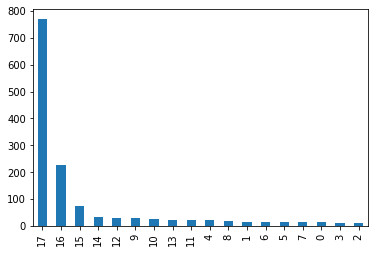

In [ ]:
df_idade_menor['paciente_idade'].astype(int).value_counts().plot.bar()

In [ ]:
# De forma semelhante, vamos identificar os casos de vacinação em paciente de idade superior a 110 anos

df_idade_maior = df_vacinacao[(df_vacinacao.paciente_idade > 110.0)]
len(df_idade_maior)

1986

In [ ]:
# Dos 1986 casos encontrados, quantos são em cada idade:

df_idade_maior['paciente_idade'].astype(int).value_counts()

121    1817
111      45
112      32
113      22
114      21
115      17
119       6
116       5
117       4
120       4
221       3
118       2
127       2
164       1
122       1
123       1
124       1
126       1
128       1
Name: paciente_idade, dtype: int64

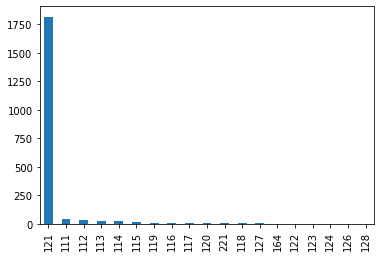

In [ ]:
df_idade_maior['paciente_idade'].astype(int).value_counts().plot.bar()

In [ ]:
# Para os casos encontrados de idade menor que 18 anos ou idade maior que 110 anos,
# a idade será calculada a partir da dada de nascimento e data de vacinação

# A idade calculada será armazanada em nova coluna

from datetime import date, timedelta

df_idade_menor['idade_calculada']= (pd.to_datetime(df_idade_menor['vacina_dataAplicacao']) - pd.to_datetime(df_idade_menor['paciente_dataNascimento'], utc=True)) // timedelta(days=365.2425) # menor de 18 anos
df_idade_maior['idade_calculada']= (pd.to_datetime(df_idade_maior['vacina_dataAplicacao']) - pd.to_datetime(df_idade_maior['paciente_dataNascimento'], utc=True)) // timedelta(days=365.2425) # maior de 110 anos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df_idade_menor.columns   # Observe que a coluna "idade_calculada" foi criada

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_nacionalidade_enumNacionalidade',
       'estabelecimento_valor', 'estabelecimento_municipio_codigo',
       'estabelecimento_municipio_nome', 'estabelecimento_uf',
       'vacina_grupoAtendimento_codigo', 'vacina_grupoAtendimento_nome',
       'vacina_categoria_codigo', 'vacina_categoria_nome',
       'vacina_fabricante_nome', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_nome', 'data_importacao_rnds',
       'idade_calculada'],
      dtype='object')

In [ ]:
df_idade_maior.columns   # Observe que a coluna "idade_calculada" foi criada

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_nacionalidade_enumNacionalidade',
       'estabelecimento_valor', 'estabelecimento_municipio_codigo',
       'estabelecimento_municipio_nome', 'estabelecimento_uf',
       'vacina_grupoAtendimento_codigo', 'vacina_grupoAtendimento_nome',
       'vacina_categoria_codigo', 'vacina_categoria_nome',
       'vacina_fabricante_nome', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_nome', 'data_importacao_rnds',
       'idade_calculada'],
      dtype='object')

In [ ]:
# Para verificar se o tratamento funcionou, vamos avaliar quantos registros a idade calculada é diferente da idade original do dataset

print(len(df_idade_menor[df_idade_menor.paciente_idade != df_idade_menor.idade_calculada])) # menor de 18 anos
print(len(df_idade_maior[df_idade_maior.paciente_idade != df_idade_maior.idade_calculada])) # maior de 110 anos

# Podemos observar abaixo que o resultado foi zero registros, isso quer dizer que não é possível tratar a idade a partir da data de nascimento, pois obtem-se o mesmo resultado
# Esses valores de idades abaixo de 18 anos e acima de 110 anos serão descartados no momento da análise

0
0


## 3.2) Importação e tratamento do dataset dos Estabelecimentos de Saúde (CNES)

In [87]:
# Salve o dataset de CNES no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_cnes = pd.read_csv('/content/drive/My Drive/TESI_FCD/cnes_ativonone.csv',delimiter=',')

### Exploração inicial do DataSet de Estabelecimentos de Saúde (CNES)

In [88]:
# Código reprodutível
assert len(df_cnes) == 354804

In [89]:
print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset
print('')
print(df_cnes.info())                        # Informações sobre o dataset 

# Observe o total de linhas e o total de colunas (12) do dataset

Total de registros: 354804

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354804 entries, 0 to 354803
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          354804 non-null  int64 
 1   co_ibge          354804 non-null  int64 
 2   no_fantasia      354796 non-null  object
 3   ds_tipo_unidade  354804 non-null  object
 4   tp_gestao        354804 non-null  object
 5   no_logradouro    354804 non-null  object
 6   nu_endereco      354517 non-null  object
 7   no_bairro        354801 non-null  object
 8   co_cep           354804 non-null  int64 
 9   uf               354434 non-null  object
 10  municipio        354434 non-null  object
 11  nu_telefone      279394 non-null  object
dtypes: int64(3), object(9)
memory usage: 32.5+ MB
None


In [ ]:
df_cnes.head(10)        # Visualização dos registros iniciais

,co_cnes,co_ibge,no_fantasia,ds_tipo_unidade,tp_gestao,no_logradouro,nu_endereco,no_bairro,co_cep,uf,municipio,nu_telefone
0,6577687,292240,SECRETARIA DE SAUDE DE MUTUIPE,CENTRAL DE GESTAO EM SAUDE,M,RUA RUY BARBOSA,S/N,CENTRO,45480000,BA,Mutuípe,NaN
1,6578500,500210,REABILIT CONSULTORIO DE FISIOTERAPIA,CLINICA/CENTRO DE ESPECIALIDADE,M,ALMIRANTE BARROSO,S/N,CENTRO,79260000,MS,Bela Vista,NaN
2,6577725,355660,SECRETARIA MUNICIPAL DE SAUDE E HIGIENE DE VER...,CENTRAL DE GESTAO EM SAUDE,M,RUA PAULO GUERREIRO FRANCO,997,CENTRO,17560000,SP,Vera Cruz,NaN
3,6577733,355410,CONS SERGIO LUIZ TEIXEIRA M PERES,CONSULTORIO ISOLADO,M,PCA MONS SILVA BARROS,254,CENTRO,12020070,SP,Taubaté,36351489
4,6577768,410490,LABORATORIO DOFF SOTTA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA DR JORGE XAVIER DA SILVA,1078,CENTRO,84165000,PR,Castro,3232-4854
5,6577806,420245,SAMU BOMBINHAS,UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA ...,M,RUA CACHALOTE,589,MORRINHOS,88215000,SC,Bombinhas,33934363
6,6577830,240260,CENTRO DE ATENCAO PSICOSSOCIAL CAPS II,CENTRO DE ATENCAO PSICOSSOCIAL,M,RUA POETISA DOLORES,13,CENTRO,59570000,RN,Ceará-Mirim,(84)3274-5914
7,6577865,315960,DIMENSAO CLINICA MEDICA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA CEL GABRIEL CAPISTRANO,256,CENTRO,37540000,MG,Santa Rita do Sapucaí,3534713531
8,6577873,355670,JULIANA PEREIRA PERSI,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA ROCINHA,213,CAPELA,13280000,SP,Vinhedo,38764932
9,6577881,231330,CENTRAL DE CONSULTORIOS,CLINICA/CENTRO DE ESPECIALIDADE,M,RUA MAFISA CIDRAO ROCHA,63,CENTRO,63660000,CE,Tauá,88-34371097


In [90]:
df_cnes.columns

Index(['co_cnes', 'co_ibge', 'no_fantasia', 'ds_tipo_unidade', 'tp_gestao',
       'no_logradouro', 'nu_endereco', 'no_bairro', 'co_cep', 'uf',
       'municipio', 'nu_telefone'],
      dtype='object')

In [91]:
# Análise inicial dos tipos de estabelecimentos de saúde
df_cnes['ds_tipo_unidade'].value_counts()

CONSULTORIO ISOLADO                                             175140
CLINICA/CENTRO DE ESPECIALIDADE                                  52766
CENTRO DE SAUDE/UNIDADE BASICA                                   38998
UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOLADO)               27067
POSTO DE SAUDE                                                   11345
POLICLINICA                                                       8457
CENTRAL DE GESTAO EM SAUDE                                        6059
HOSPITAL GERAL                                                    5752
UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA DE URGENCIA         4703
FARMACIA                                                          3213
CENTRO DE ATENCAO PSICOSSOCIAL                                    3065
UNIDADE DE VIGILANCIA EM SAUDE                                    3005
POLO ACADEMIA DA SAUDE                                            2523
UNIDADE MOVEL TERRESTRE                                           1460
PRONTO

### Eliminação de colunas e linhas que não serão utilizadas do dataset de CNES

In [92]:
# Eliminação das colunas que não serão utilizadas nas análises

df_cnes = df_cnes.drop(['co_ibge','no_logradouro','nu_endereco','no_bairro','co_cep', 'municipio','nu_telefone'],axis=1)

In [93]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe

df_cnes = df_cnes.loc[(df_cnes['uf'].isin(UFs))]

In [32]:
print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset após eliminação de linhas
print('')
print(df_cnes.info())                        # Informações sobre o dataset 

# É possível observar a redução do número total de linhas e do número total de colunas (5) do dataset

Total de registros: 183257

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183257 entries, 2 to 354803
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          183257 non-null  int64 
 1   no_fantasia      183252 non-null  object
 2   ds_tipo_unidade  183257 non-null  object
 3   tp_gestao        183257 non-null  object
 4   uf               183257 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.4+ MB
None


### Tratamento de valores nulos e/ou faltantes

In [94]:
df_cnes.count()       # Quantidade de registros por coluna. 
                      # É possível observar que a coluna no_fantasia possui quantidade inferior de registros, mas  
                      # não será necessário tratamento de dados nessa coluna pois a mesma não será utilizada nas análises

co_cnes            183257
no_fantasia        183252
ds_tipo_unidade    183257
tp_gestao          183257
uf                 183257
dtype: int64

### Identificação e tratamento de valores duplicados

In [95]:
#Lista todos os registros em que o "co_cnes" apareça mais de 2 vezes

duplicados_CNESmais2 = df_cnes[df_cnes['co_cnes'].isin(df_cnes['co_cnes'].value_counts()[df_cnes['co_cnes'].value_counts()>2].index)].sort_values(by=["co_cnes"])

In [96]:
# Quantos são os que tem mais de dois registros duplicados e listagem dos primeiros casos

print(len(duplicados_CNESmais2))
duplicados_CNESmais2.head(10)

0


,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf


In [32]:
# Pra garantir que não existe duplicidade será feito mais esse teste

# Verifica quantos registros contém o campo 'co_cnes' em duplicidade
# Não considera a primeira ocorrência como duplicada

df_cnes.duplicated(subset=['co_cnes']).value_counts()

False    183257
dtype: int64

## 3.3) Merge entre os dataFrames de Vacinação e CNES

In [97]:
df_merge = pd.merge(df_vacinacao, df_cnes, on=None, left_on='estabelecimento_valor', right_on='co_cnes')

In [98]:
print(df_merge)

                                       document_id  ...  uf
0        62e8806f-e2d0-4372-9b47-1dc359a67bc1-i0b0  ...  SP
1        27823b35-e19f-4a4c-afe2-544eb0d03502-i0b0  ...  SP
2        3812181a-cc29-4e1f-bf95-f2d0064ad839-i0b0  ...  SP
3        0e929adc-effd-4a5e-bac8-b1674a2b1461-i0b0  ...  SP
4        82887c20-0bda-438e-985e-61555b15f7eb-i0b0  ...  SP
...                                            ...  ...  ..
3382287  a3dd3bd4-8aaf-4789-9651-4d8e700c3f09-i0b0  ...  PA
3382288  3029db2c-2fc1-477a-a47e-890837556c22-i0b0  ...  MG
3382289  d2be60d4-d45c-450f-8f6b-0d935a662948-i0b0  ...  SP
3382290  761da6be-0732-4f5d-a8c1-11019238b4d6-i0b0  ...  MG
3382291  bd46ee1e-1628-4102-b40b-441da132d8fc-i0b0  ...  SP

[3382292 rows x 31 columns]


## 3.4) Criação do dataframe da região sudeste a partir do merge dos datasets

In [99]:
# Criação do dataframe da região sudeste

df_merge_sudeste = df_merge.query('paciente_endereco_uf in ["ES", "MG", "RJ", "SP"]')

In [36]:
df_merge_sudeste.count()

document_id                                 2815804
paciente_id                                 2815804
paciente_idade                              2815804
paciente_dataNascimento                     2815804
paciente_enumSexoBiologico                  2815804
paciente_racaCor_codigo                     2815804
paciente_racaCor_valor                      2815804
paciente_endereco_coIbgeMunicipio           2815804
paciente_endereco_coPais                    2815804
paciente_endereco_nmMunicipio               2815804
paciente_endereco_nmPais                    2815804
paciente_endereco_uf                        2815804
paciente_nacionalidade_enumNacionalidade    2811997
estabelecimento_valor                       2815804
estabelecimento_municipio_codigo            2815804
estabelecimento_municipio_nome              2815804
estabelecimento_uf                          2815804
vacina_grupoAtendimento_codigo              2815804
vacina_grupoAtendimento_nome                2788036
vacina_categ

In [37]:
df_merge_sudeste

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
0,62e8806f-e2d0-4372-9b47-1dc359a67bc1-i0b0,000000e609b2d587d14a6982d7e276dc37de728627d216...,29,1991-06-04,F,1,BRANCA,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 06:01:35,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1,27823b35-e19f-4a4c-afe2-544eb0d03502-i0b0,000163bbe1300e28300dd46372ed912713b9c92fcfdff2...,55,1965-11-15,F,1,BRANCA,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-06T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 04:02:45,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
2,3812181a-cc29-4e1f-bf95-f2d0064ad839-i0b0,002797709cb773dc3ff535aaf6a2e4dd23a70e40a78c2c...,33,1987-04-19,F,1,BRANCA,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 13:02:16,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3,0e929adc-effd-4a5e-bac8-b1674a2b1461-i0b0,0048972b9942f71f09b60ab718f14339d24e44255015f5...,58,1962-08-03,M,99,SEM INFORMACAO,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 06:02:54,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
4,82887c20-0bda-438e-985e-61555b15f7eb-i0b0,006b61c9a133d493743e624dd17e1cc7a8ec45a73f9d49...,37,1983-04-26,F,1,BRANCA,352680,10,LENCOIS PAULISTA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 14:02:24,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382286,c4e2163d-c00f-4e1d-ac8b-d9321dcb9557-i0b0,f740d8c741f78b60472e1ce9528556ed4bd7e5418b9548...,50,1970-05-11,F,1,BRANCA,330630,10,VOLTA REDONDA,BRASIL,RJ,B,2074672,350315,ARAPEI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 07:01:40,2074672,UNIDADE BASICA DE SAUDE DE ARAPEI DR HAROLDO V...,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3382288,3029db2c-2fc1-477a-a47e-890837556c22-i0b0,fa4ce5506acc064ac80f257006e8a9dbfebf4ccc663f19...,92,1928-10-28,F,99,SEM INFORMACAO,312770,10,GOVERNADOR VALADARES,BRASIL,MG,B,2119021,312770,GOVERNADOR VALADARES,MG,205,Pessoas de 80 anos ou mais,2,Faixa Etária,FUNDACAO BUTANTAN,2021-02-10T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-24 19:09:36,2119021,ESF TURMALINA I,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382289,d2be60d4-d45c-450f-8f6b-0d935a662948-i0b0,fb2aebbcc9f972fb360ca478c71e99cb39e20382afac87...,40,1980-06-19,F,1,BRANCA,351490,10,ELIAS FAUSTO,BRASIL,SP,B,6829821,351040,CAPIVARI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-09T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-09 15:02:00,6829821,UBS SANTA RITA CAPIVARI,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3382290,761da6be-0732-4f5d-a8c1-11019238b4d6-i0b0,fda6a75710d653a583b0624e71107f03c4b875b240a99e...,95,1925-08-03,F,1,BRANCA,31

## 3.5) Criação do dataframe da região norte a partir do merge dos datasets

In [100]:
# Criação do dataframe da região norte
df_merge_norte = df_merge.query('paciente_endereco_uf in ["AM", "AC", "AP", "PA", "RO", "RR", "TO"]')

In [39]:
df_merge_norte.count()

document_id                                 488297
paciente_id                                 488297
paciente_idade                              488297
paciente_dataNascimento                     488297
paciente_enumSexoBiologico                  488297
paciente_racaCor_codigo                     488297
paciente_racaCor_valor                      488297
paciente_endereco_coIbgeMunicipio           488297
paciente_endereco_coPais                    488297
paciente_endereco_nmMunicipio               488297
paciente_endereco_nmPais                    488297
paciente_endereco_uf                        488297
paciente_nacionalidade_enumNacionalidade    487350
estabelecimento_valor                       488297
estabelecimento_municipio_codigo            488297
estabelecimento_municipio_nome              488297
estabelecimento_uf                          488297
vacina_grupoAtendimento_codigo              488297
vacina_grupoAtendimento_nome                479968
vacina_categoria_codigo        

In [ ]:
df_merge_norte

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
37,3dfc58d4-862d-42a8-ad3b-fb77b4dcff80-i0b0,01a928b2ace5b2f5c83d31f3f32e752b59e3fad4b7269b...,25,1995-08-20,F,3,PARDA,150360,10,ITAITUBA,BRASIL,PA,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 12:01:28,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
425,12a02188-a574-454a-bc3a-c0e5d06d90ef-i0b0,1226eac6a1a9df2832b8e13e1cdac0ca6c02212de2e3cf...,48,1972-09-18,F,1,BRANCA,150503,10,NOVO PROGRESSO,BRASIL,PA,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 11:01:32,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1726,0dee2e04-4a79-4c7e-b48c-838ac4ab5ab3-i0b0,4a3132e90777d778c9119abbd59914d77f1d572e6ddbec...,87,1933-11-02,M,1,BRANCA,110020,10,PORTO VELHO,BRASIL,RO,B,2082772,352900,MARILIA,SP,205,Pessoas de 80 anos ou mais,2,Faixa Etária,Sinovac,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 15:02:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3647,d7948974-f1d1-4114-afcf-f493b1078dbb-i0b0,9cbeef584b47dafe2d60ce90121e9f23f7092a4a37ae59...,85,1935-07-25,F,1,BRANCA,172100,10,PALMAS,BRASIL,TO,B,2082772,352900,MARILIA,SP,205,Pessoas de 80 anos ou mais,2,Faixa Etária,Sinovac,2021-02-01T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-01 15:02:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3666,d4bb084f-20bd-448a-b04e-b66119431942-i0b0,9de05f3ce92ad84cc53c72c16246f32305d001b0b434bd...,54,1966-10-20,M,4,AMARELA,130280,10,MARAA,BRASIL,AM,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 03:00:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382266,ef97e480-4723-4060-9636-576fd6b3400c-i0b0,d2120f1bd6c8f608650bf9a54ca88748692569f24ce4e2...,29,1991-01-29,M,3,PARDA,130260,10,MANAUS,BRASIL,AM,B,3748774,130115,CAREIRO DA VARZEA,AM,923,Técnico de Enfermagem,9,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-24T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 21:42:44,3748774,UNIDADE BASICA DE SAUDE ANTONIO BENTO MIGUES,POSTO DE SAUDE,M,AM
3382267,95d2f604-3a40-4119-9061-d23678e94d66-i0b0,d3604f31f4a6a7e744a42536c15c7185648341b1603ab8...,74,1946-07-14,M,4,AMARELA,130270,10,MANICORE,BRASIL,AM,B,2708868,130270,MANICORE,AM,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:31:21,2708868,CENTRO DE SAUDE MAE LAURINDA,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382268,6ae9f792-a3fd-4959-9d7b-f351b7f39887-i0b0,d5609f55139e9df810ef79744aed82807d50d158cadea1...,73,1947-05-05,F,4,AMARELA,130270,10,MANICORE,BRASIL,AM,B,2708868,130270,MANICORE,AM,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:31:21,2708868,CENTRO DE SAUDE MAE LAURINDA,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382285,023d5f9a-8c59-4a36-abe7-2cb1225d3df8-i0b0,f704547d24ac4e8e2f1463f376dac0edef303e421b4b29...,28,1992-10-22,M,3,PARDA,150030,1

## 3.6) Importação do dataset de Regiões Metropolitanas

In [101]:
# Salve o dataset de Regiões Metropolitanas no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_rm = pd.read_csv('/content/drive/My Drive/TESI_FCD/RM_Norte_Sudeste.csv',delimiter=';')

### Informações do dataset importado

In [102]:
# Código reprodutível - Teste unitário
assert len(df_rm) == 349

In [103]:
print('Total de registros:',len(df_rm))    # Quantidade de registros do dataset
print('')
print(df_rm.info())  # Informações sobre o dataset 

# Observe o total de linhas (349) e o total de colunas (4) do dataset

Total de registros: 349

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   REGIÃO         349 non-null    object
 1   UF             349 non-null    object
 2   MUNICIPIO      349 non-null    object
 3   COD_MUNICIPIO  349 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.0+ KB
None


### Primeiros registros do dataset

In [44]:
df_rm.head(5)        # Visualização dos registros iniciais

,REGIÃO,UF,MUNICIPIO,COD_MUNICIPIO
0,NORTE,AC,RIO BRANCO,1200401
1,NORTE,AM,AUTAZES,1300300
2,NORTE,AM,CAREIRO,1301100
3,NORTE,AM,CAREIRO DA VÁRZEA,1301159
4,NORTE,AM,IRANDUBA,1301852


## 3.7) Criação do dataframe da região metropolitana da região sudeste a partir do dataframe da região sudeste

### Fazendo uma cópia do dataset de regiões metropolitanas e retirando os acentos do campo "MUNICIPIO" do dataset de Regiões Metropolitanas

In [104]:
import unicodedata
df_rm_normalizado = df_rm.copy()
df_rm_normalizado["MUNICIPIO"] = df_rm_normalizado["MUNICIPIO"].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii','ignore').decode('utf8'))
df_rm_normalizado.head(5)

,REGIÃO,UF,MUNICIPIO,COD_MUNICIPIO
0,NORTE,AC,RIO BRANCO,1200401
1,NORTE,AM,AUTAZES,1300300
2,NORTE,AM,CAREIRO,1301100
3,NORTE,AM,CAREIRO DA VARZEA,1301159
4,NORTE,AM,IRANDUBA,1301852


### Criando dataframe da região metropolitana da região sudeste (df_merge_sudeste_rm)

A comparação foi feita pelo campo de Nome de Município, pois há uma inconsistência no dataset de vacinação quanto ao campo "Código IBGE do Município do Vacinado". Esse código de fato tem 7 dígitos, porém nesse dataset possui 6.

In [105]:
# Criação do dataframe da região sudeste
# Problema: durante a implementação repercebu-se que o campo "Código IBGE" dos datasets de Vacinação e CNES estão com 6 dígitos,
# enquanto no dataset de municípios do IBGE, tem 7 dígitos. Por pesquisa na internet, verificou-se que o correto seria realmente 7 dígitos.
# Devido a esse fato, optou-se por usar o campo "Nome do Município", ao invés do "Código IBGE"

df_merge_sudeste_rm = df_merge_sudeste[df_merge_sudeste['paciente_endereco_nmMunicipio'].isin(df_rm_normalizado.MUNICIPIO)]
df_merge_sudeste_rm

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
6,d85b0d26-7357-4283-9c11-4e835bcbfc43-i0b0,0079899472ae1d423d806f787d9b714b8fd6ef1794243a...,29,1991-04-11,F,1,BRANCA,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 04:01:37,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
8,1be2c976-6d20-41c1-8233-23dda994e84e-i0b0,0086a6ac958d1785ab8cbf2f588caac93898ff1f3070de...,33,1987-03-30,F,1,BRANCA,350950,10,CAMPINAS,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 15:01:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
78,dcf4c3bb-60cd-4e84-92e5-f035d463e880-i0b0,03871aba4fe133814d6316fcf1e43845d93b9ab0c7092d...,22,1998-12-06,F,4,AMARELA,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 08:01:54,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
235,93145deb-3afa-4541-b9a8-565d2bb87a40-i0b0,0ab6c8485eb2135ef56a0989ca533bf27042654ac32307...,39,1981-09-11,F,99,SEM INFORMACAO,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 13:01:20,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
302,6de9786e-318a-4223-8e51-59384ef311ab-i0b0,0d8225426e1bfe968165cfa4574065daea85e4b781e783...,35,1985-10-04,M,1,BRANCA,350160,10,AMERICANA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-06T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 14:02:20,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382273,2238c752-e5d5-46a6-903b-79280daf31f7-i0b0,da3df2349e7f9a69131e31fcfe25f9f444f4fc62546f6b...,91,1929-02-28,F,3,PARDA,311340,10,CARATINGA,BRASIL,MG,B,2169088,311340,CARATINGA,MG,205,Pessoas de 80 anos ou mais,2,Faixa Etária,FUNDACAO OSWALDO CRUZ,2021-02-12T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-23 18:25:04,2169088,ESF NOSSA SENHORA APARECIDA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382276,39179df0-f262-4db2-b40f-26caf704ebf8-i0b0,de3351a9a041955d04f64e7e45320e9a11faa92ec79628...,85,1935-09-02,M,4,AMARELA,315780,10,SANTA LUZIA,BRASIL,MG,B,6198279,315780,SANTA LUZIA,MG,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 13:59:27,6198279,UNIDADE DE SAUDE NOVA CONQUISTA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382278,3f238844-181f-45df-bbcd-187fe17d05ac-i0b0,e2573345ab548b569c91e537f1855e0068dc861c43d545...,41,1979-06-21,F,99,SEM INFORMACAO,320130,10,CARIACICA,BRASIL,ES,B,2486318,320510,VIANA,ES,926,Outros,9,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-03-01T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-03-02 15:56:21,2486318,UNIDADE DE SAUDE DA FAMILIA PRIMAVERA,CENTRO DE SAUDE/UNIDADE BASICA,M,ES
3382279,5eba1a12-14b2-4d38-89ad-21acff201531-i0b0,fe12bc7b3dab7e9d609d5f1d9b9228b0bef82c26841d5d...,35,1985-09-17,F,4,AMARELA

### Testando a não existência de registros de pacientes domiciliados em cidades não metropolitanas

In [106]:
df_merge_sudeste_rm.query('paciente_endereco_nmMunicipio in ["ITAPERUNA"]') #deve retornar vazio
#df_merge_sudeste.query('paciente_endereco_nmMunicipio in ["ITAPERUNA"]') #deve retornar registros

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf


In [46]:
df_merge_sudeste_rm.count()

document_id                                 1761264
paciente_id                                 1761264
paciente_idade                              1761264
paciente_dataNascimento                     1761264
paciente_enumSexoBiologico                  1761264
paciente_racaCor_codigo                     1761264
paciente_racaCor_valor                      1761264
paciente_endereco_coIbgeMunicipio           1761264
paciente_endereco_coPais                    1761264
paciente_endereco_nmMunicipio               1761264
paciente_endereco_nmPais                    1761264
paciente_endereco_uf                        1761264
paciente_nacionalidade_enumNacionalidade    1759264
estabelecimento_valor                       1761264
estabelecimento_municipio_codigo            1761264
estabelecimento_municipio_nome              1761264
estabelecimento_uf                          1761264
vacina_grupoAtendimento_codigo              1761264
vacina_grupoAtendimento_nome                1741747
vacina_categ

In [ ]:
df_merge_sudeste_rm

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
6,d85b0d26-7357-4283-9c11-4e835bcbfc43-i0b0,0079899472ae1d423d806f787d9b714b8fd6ef1794243a...,29,1991-04-11,F,1,BRANCA,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 04:01:37,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
8,1be2c976-6d20-41c1-8233-23dda994e84e-i0b0,0086a6ac958d1785ab8cbf2f588caac93898ff1f3070de...,33,1987-03-30,F,1,BRANCA,350950,10,CAMPINAS,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 15:01:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
78,dcf4c3bb-60cd-4e84-92e5-f035d463e880-i0b0,03871aba4fe133814d6316fcf1e43845d93b9ab0c7092d...,22,1998-12-06,F,4,AMARELA,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 08:01:54,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
235,93145deb-3afa-4541-b9a8-565d2bb87a40-i0b0,0ab6c8485eb2135ef56a0989ca533bf27042654ac32307...,39,1981-09-11,F,99,SEM INFORMACAO,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 13:01:20,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
302,6de9786e-318a-4223-8e51-59384ef311ab-i0b0,0d8225426e1bfe968165cfa4574065daea85e4b781e783...,35,1985-10-04,M,1,BRANCA,350160,10,AMERICANA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-06T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 14:02:20,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382273,2238c752-e5d5-46a6-903b-79280daf31f7-i0b0,da3df2349e7f9a69131e31fcfe25f9f444f4fc62546f6b...,91,1929-02-28,F,3,PARDA,311340,10,CARATINGA,BRASIL,MG,B,2169088,311340,CARATINGA,MG,205,Pessoas de 80 anos ou mais,2,Faixa Etária,FUNDACAO OSWALDO CRUZ,2021-02-12T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-23 18:25:04,2169088,ESF NOSSA SENHORA APARECIDA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382276,39179df0-f262-4db2-b40f-26caf704ebf8-i0b0,de3351a9a041955d04f64e7e45320e9a11faa92ec79628...,85,1935-09-02,M,4,AMARELA,315780,10,SANTA LUZIA,BRASIL,MG,B,6198279,315780,SANTA LUZIA,MG,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 13:59:27,6198279,UNIDADE DE SAUDE NOVA CONQUISTA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382278,3f238844-181f-45df-bbcd-187fe17d05ac-i0b0,e2573345ab548b569c91e537f1855e0068dc861c43d545...,41,1979-06-21,F,99,SEM INFORMACAO,320130,10,CARIACICA,BRASIL,ES,B,2486318,320510,VIANA,ES,926,Outros,9,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-03-01T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-03-02 15:56:21,2486318,UNIDADE DE SAUDE DA FAMILIA PRIMAVERA,CENTRO DE SAUDE/UNIDADE BASICA,M,ES
3382279,5eba1a12-14b2-4d38-89ad-21acff201531-i0b0,fe12bc7b3dab7e9d609d5f1d9b9228b0bef82c26841d5d...,35,1985-09-17,F,4,AMARELA

## 3.8) Criação do dataframe da região metropolitana da região norte a partir do dataframe da região norte

### Criando dataframe da região metropolitana da região norte (df_merge_norte_rm)

A comparação foi feita pelo campo de Nome de Município, pois há uma inconsistência no dataset de vacinação quanto ao campo "Código IBGE do Município do Vacinado". Esse código de fato tem 7 dígitos, porém nesse dataset possui 6.

In [107]:
df_merge_norte_rm = df_merge_norte[df_merge_norte['paciente_endereco_nmMunicipio'].isin(df_rm_normalizado.MUNICIPIO)]
df_merge_norte_rm

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
1726,0dee2e04-4a79-4c7e-b48c-838ac4ab5ab3-i0b0,4a3132e90777d778c9119abbd59914d77f1d572e6ddbec...,87,1933-11-02,M,1,BRANCA,110020,10,PORTO VELHO,BRASIL,RO,B,2082772,352900,MARILIA,SP,205,Pessoas de 80 anos ou mais,2,Faixa Etária,Sinovac,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 15:02:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3647,d7948974-f1d1-4114-afcf-f493b1078dbb-i0b0,9cbeef584b47dafe2d60ce90121e9f23f7092a4a37ae59...,85,1935-07-25,F,1,BRANCA,172100,10,PALMAS,BRASIL,TO,B,2082772,352900,MARILIA,SP,205,Pessoas de 80 anos ou mais,2,Faixa Etária,Sinovac,2021-02-01T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-01 15:02:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
4485,cc6dfefc-0bba-4ecd-bbeb-6ff96ac536ce-i0b0,c1b8334b049620539dbc73e521d8a81861c81ffcf13005...,87,1934-01-02,F,1,BRANCA,110020,10,PORTO VELHO,BRASIL,RO,B,2082772,352900,MARILIA,SP,205,Pessoas de 80 anos ou mais,2,Faixa Etária,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 13:02:09,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
5576,cbec1603-2e8e-4f96-87e1-2ee8fe3385f6-i0b0,eee21a5aa7db33285bdb277cd06ea3c095558484d69081...,35,1985-04-14,F,3,PARDA,150442,10,MARITUBA,BRASIL,PA,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 05:02:25,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
7406,d756afda-a303-428b-98ed-209b87b29d49-i0b0,01b1259e3933f4fa39a242600f2be7778aef0eb22f7835...,27,1993-05-01,M,1,BRANCA,150140,10,BELEM,BRASIL,PA,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 11:01:55,2077485,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,HOSPITAL GERAL,E,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382153,d006949a-5e39-448e-a144-987d40d4deb3-i0b0,84f0c24f4fad6c62485c72530cfd038a7f24ff93f482c1...,71,1949-11-22,F,3,PARDA,130260,10,MANAUS,BRASIL,AM,B,2016184,130260,MANAUS,AM,203,Pessoas de 70 a 74 anos,2,Faixa Etária,University of Oxford/AstraZeneca,2021-02-20T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-21 23:27:46,2016184,UBS PETROPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382236,7c132b3c-3347-4ba7-89d3-70941c0cbbf7-i0b0,f792b24761345f3e33e23d508c2209d98c71d7d189d439...,90,1930-03-22,F,4,AMARELA,150080,10,ANANINDEUA,BRASIL,PA,B,9359524,150170,BRAGANCA,PA,205,Pessoas de 80 anos ou mais,2,Faixa Etária,SERUM INSTITUTE OF INDIA LTD,2021-02-12T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-20 01:50:44,9359524,UNIDADE DE SAUDE DA FAMILIA DO BACURI PRATA,CENTRO DE SAUDE/UNIDADE BASICA,M,PA
3382255,4c3884bd-6ae6-4b1f-aa57-5538a53cc046-i0b0,c7e34ed05ade738ec70f100a3ea7706d369d32b6093ce4...,39,1981-08-19,F,1,BRANCA,160030,10,MACAPA,BRASIL,AP,B,7495684,150250,CHAVES,PA,907,Enfermeiro(a),9,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-24 00:54:11,7495684,UNIDADE BASICA DE SAUDE DO GANHOAO,CENTRO DE SAUDE/UNIDADE BASICA,M,PA
3382258,eb4b30c7-ea3b-4002-bf6b-9664fa56ee28-i0b0,c96be89dcdbdb1

### Testando que não tem registros de pacientes domiciliados em cidades não metropolitanas

In [108]:
df_merge_norte_rm.query('paciente_endereco_nmMunicipio in ["MARABA"]') # deve retornar vazio
#df_merge_norte.query('paciente_endereco_nmMunicipio in ["MARABA"]') # deve retornar registros

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf


In [49]:
df_merge_sudeste_rm.count()

document_id                                 1761264
paciente_id                                 1761264
paciente_idade                              1761264
paciente_dataNascimento                     1761264
paciente_enumSexoBiologico                  1761264
paciente_racaCor_codigo                     1761264
paciente_racaCor_valor                      1761264
paciente_endereco_coIbgeMunicipio           1761264
paciente_endereco_coPais                    1761264
paciente_endereco_nmMunicipio               1761264
paciente_endereco_nmPais                    1761264
paciente_endereco_uf                        1761264
paciente_nacionalidade_enumNacionalidade    1759264
estabelecimento_valor                       1761264
estabelecimento_municipio_codigo            1761264
estabelecimento_municipio_nome              1761264
estabelecimento_uf                          1761264
vacina_grupoAtendimento_codigo              1761264
vacina_grupoAtendimento_nome                1741747
vacina_categ

In [ ]:
df_merge_sudeste_rm

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
6,d85b0d26-7357-4283-9c11-4e835bcbfc43-i0b0,0079899472ae1d423d806f787d9b714b8fd6ef1794243a...,29,1991-04-11,F,1,BRANCA,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 04:01:37,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
8,1be2c976-6d20-41c1-8233-23dda994e84e-i0b0,0086a6ac958d1785ab8cbf2f588caac93898ff1f3070de...,33,1987-03-30,F,1,BRANCA,350950,10,CAMPINAS,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 15:01:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
78,dcf4c3bb-60cd-4e84-92e5-f035d463e880-i0b0,03871aba4fe133814d6316fcf1e43845d93b9ab0c7092d...,22,1998-12-06,F,4,AMARELA,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 08:01:54,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
235,93145deb-3afa-4541-b9a8-565d2bb87a40-i0b0,0ab6c8485eb2135ef56a0989ca533bf27042654ac32307...,39,1981-09-11,F,99,SEM INFORMACAO,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 13:01:20,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
302,6de9786e-318a-4223-8e51-59384ef311ab-i0b0,0d8225426e1bfe968165cfa4574065daea85e4b781e783...,35,1985-10-04,M,1,BRANCA,350160,10,AMERICANA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-06T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 14:02:20,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382273,2238c752-e5d5-46a6-903b-79280daf31f7-i0b0,da3df2349e7f9a69131e31fcfe25f9f444f4fc62546f6b...,91,1929-02-28,F,3,PARDA,311340,10,CARATINGA,BRASIL,MG,B,2169088,311340,CARATINGA,MG,205,Pessoas de 80 anos ou mais,2,Faixa Etária,FUNDACAO OSWALDO CRUZ,2021-02-12T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-23 18:25:04,2169088,ESF NOSSA SENHORA APARECIDA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382276,39179df0-f262-4db2-b40f-26caf704ebf8-i0b0,de3351a9a041955d04f64e7e45320e9a11faa92ec79628...,85,1935-09-02,M,4,AMARELA,315780,10,SANTA LUZIA,BRASIL,MG,B,6198279,315780,SANTA LUZIA,MG,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 13:59:27,6198279,UNIDADE DE SAUDE NOVA CONQUISTA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382278,3f238844-181f-45df-bbcd-187fe17d05ac-i0b0,e2573345ab548b569c91e537f1855e0068dc861c43d545...,41,1979-06-21,F,99,SEM INFORMACAO,320130,10,CARIACICA,BRASIL,ES,B,2486318,320510,VIANA,ES,926,Outros,9,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-03-01T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-03-02 15:56:21,2486318,UNIDADE DE SAUDE DA FAMILIA PRIMAVERA,CENTRO DE SAUDE/UNIDADE BASICA,M,ES
3382279,5eba1a12-14b2-4d38-89ad-21acff201531-i0b0,fe12bc7b3dab7e9d609d5f1d9b9228b0bef82c26841d5d...,35,1985-09-17,F,4,AMARELA

## 3.9) Criação do dataframe da região interiorana da região sudeste a partir do dataframe da região sudeste

### Criando dataframe da região interiorana da região sudeste (df_merge_sudeste_int)

A comparação foi feita pelo campo de Nome de Município, pois há uma inconsistência no dataset de vacinação quanto ao campo "Código IBGE do Município do Vacinado". Esse código de fato tem 7 dígitos, porém nesse dataset possui 6.

In [109]:
df_merge_sudeste_int = df_merge_sudeste[~df_merge_sudeste['paciente_endereco_nmMunicipio'].isin(df_rm_normalizado.MUNICIPIO)]
df_merge_sudeste_int

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
0,62e8806f-e2d0-4372-9b47-1dc359a67bc1-i0b0,000000e609b2d587d14a6982d7e276dc37de728627d216...,29,1991-06-04,F,1,BRANCA,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 06:01:35,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1,27823b35-e19f-4a4c-afe2-544eb0d03502-i0b0,000163bbe1300e28300dd46372ed912713b9c92fcfdff2...,55,1965-11-15,F,1,BRANCA,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-06T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 04:02:45,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
2,3812181a-cc29-4e1f-bf95-f2d0064ad839-i0b0,002797709cb773dc3ff535aaf6a2e4dd23a70e40a78c2c...,33,1987-04-19,F,1,BRANCA,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 13:02:16,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3,0e929adc-effd-4a5e-bac8-b1674a2b1461-i0b0,0048972b9942f71f09b60ab718f14339d24e44255015f5...,58,1962-08-03,M,99,SEM INFORMACAO,352900,10,MARILIA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 06:02:54,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
4,82887c20-0bda-438e-985e-61555b15f7eb-i0b0,006b61c9a133d493743e624dd17e1cc7a8ec45a73f9d49...,37,1983-04-26,F,1,BRANCA,352680,10,LENCOIS PAULISTA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 14:02:24,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382286,c4e2163d-c00f-4e1d-ac8b-d9321dcb9557-i0b0,f740d8c741f78b60472e1ce9528556ed4bd7e5418b9548...,50,1970-05-11,F,1,BRANCA,330630,10,VOLTA REDONDA,BRASIL,RJ,B,2074672,350315,ARAPEI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 07:01:40,2074672,UNIDADE BASICA DE SAUDE DE ARAPEI DR HAROLDO V...,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3382288,3029db2c-2fc1-477a-a47e-890837556c22-i0b0,fa4ce5506acc064ac80f257006e8a9dbfebf4ccc663f19...,92,1928-10-28,F,99,SEM INFORMACAO,312770,10,GOVERNADOR VALADARES,BRASIL,MG,B,2119021,312770,GOVERNADOR VALADARES,MG,205,Pessoas de 80 anos ou mais,2,Faixa Etária,FUNDACAO BUTANTAN,2021-02-10T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-24 19:09:36,2119021,ESF TURMALINA I,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382289,d2be60d4-d45c-450f-8f6b-0d935a662948-i0b0,fb2aebbcc9f972fb360ca478c71e99cb39e20382afac87...,40,1980-06-19,F,1,BRANCA,351490,10,ELIAS FAUSTO,BRASIL,SP,B,6829821,351040,CAPIVARI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-09T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-09 15:02:00,6829821,UBS SANTA RITA CAPIVARI,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3382290,761da6be-0732-4f5d-a8c1-11019238b4d6-i0b0,fda6a75710d653a583b0624e71107f03c4b875b240a99e...,95,1925-08-03,F,1,BRANCA,31

### Testando que não tem registros de pacientes domiciliados em cidades não interioranas

In [110]:
df_merge_sudeste_int.query('paciente_endereco_nmMunicipio in ["NITEROI"]') # deve retornar vazio
#df_merge_sudeste.query('paciente_endereco_nmMunicipio in ["NITEROI"]') #deve retornar registros

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf


In [ ]:
df_merge_sudeste_rm.count()

document_id                                 1761264
paciente_id                                 1761264
paciente_idade                              1761264
paciente_dataNascimento                     1761264
paciente_enumSexoBiologico                  1761264
paciente_racaCor_codigo                     1761264
paciente_racaCor_valor                      1761264
paciente_endereco_coIbgeMunicipio           1761264
paciente_endereco_coPais                    1761264
paciente_endereco_nmMunicipio               1761264
paciente_endereco_nmPais                    1761264
paciente_endereco_uf                        1761264
paciente_nacionalidade_enumNacionalidade    1759264
estabelecimento_valor                       1761264
estabelecimento_municipio_codigo            1761264
estabelecimento_municipio_nome              1761264
estabelecimento_uf                          1761264
vacina_grupoAtendimento_codigo              1761264
vacina_grupoAtendimento_nome                1741747
vacina_categ

In [ ]:
df_merge_sudeste_rm

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
6,d85b0d26-7357-4283-9c11-4e835bcbfc43-i0b0,0079899472ae1d423d806f787d9b714b8fd6ef1794243a...,29,1991-04-11,F,1,BRANCA,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 04:01:37,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
8,1be2c976-6d20-41c1-8233-23dda994e84e-i0b0,0086a6ac958d1785ab8cbf2f588caac93898ff1f3070de...,33,1987-03-30,F,1,BRANCA,350950,10,CAMPINAS,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 15:01:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
78,dcf4c3bb-60cd-4e84-92e5-f035d463e880-i0b0,03871aba4fe133814d6316fcf1e43845d93b9ab0c7092d...,22,1998-12-06,F,4,AMARELA,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 08:01:54,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
235,93145deb-3afa-4541-b9a8-565d2bb87a40-i0b0,0ab6c8485eb2135ef56a0989ca533bf27042654ac32307...,39,1981-09-11,F,99,SEM INFORMACAO,355030,10,SAO PAULO,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 13:01:20,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
302,6de9786e-318a-4223-8e51-59384ef311ab-i0b0,0d8225426e1bfe968165cfa4574065daea85e4b781e783...,35,1985-10-04,M,1,BRANCA,350160,10,AMERICANA,BRASIL,SP,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-06T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 14:02:20,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382273,2238c752-e5d5-46a6-903b-79280daf31f7-i0b0,da3df2349e7f9a69131e31fcfe25f9f444f4fc62546f6b...,91,1929-02-28,F,3,PARDA,311340,10,CARATINGA,BRASIL,MG,B,2169088,311340,CARATINGA,MG,205,Pessoas de 80 anos ou mais,2,Faixa Etária,FUNDACAO OSWALDO CRUZ,2021-02-12T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-23 18:25:04,2169088,ESF NOSSA SENHORA APARECIDA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382276,39179df0-f262-4db2-b40f-26caf704ebf8-i0b0,de3351a9a041955d04f64e7e45320e9a11faa92ec79628...,85,1935-09-02,M,4,AMARELA,315780,10,SANTA LUZIA,BRASIL,MG,B,6198279,315780,SANTA LUZIA,MG,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 13:59:27,6198279,UNIDADE DE SAUDE NOVA CONQUISTA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382278,3f238844-181f-45df-bbcd-187fe17d05ac-i0b0,e2573345ab548b569c91e537f1855e0068dc861c43d545...,41,1979-06-21,F,99,SEM INFORMACAO,320130,10,CARIACICA,BRASIL,ES,B,2486318,320510,VIANA,ES,926,Outros,9,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-03-01T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-03-02 15:56:21,2486318,UNIDADE DE SAUDE DA FAMILIA PRIMAVERA,CENTRO DE SAUDE/UNIDADE BASICA,M,ES
3382279,5eba1a12-14b2-4d38-89ad-21acff201531-i0b0,fe12bc7b3dab7e9d609d5f1d9b9228b0bef82c26841d5d...,35,1985-09-17,F,4,AMARELA

## 3.10) Criação do dataframe da região interiorana da região norte a partir do dataframe da região norte

### Criando dataframe da região interiorana da região norte (df_merge_norte_int)

A comparação foi feita pelo campo de Nome de Município, pois há uma inconsistência no dataset de vacinação quanto ao campo "Código IBGE do Município do Vacinado". Esse código de fato tem 7 dígitos, porém nesse dataset possui 6.

In [111]:
df_merge_norte_int = df_merge_norte[~df_merge_norte['paciente_endereco_nmMunicipio'].isin(df_rm_normalizado.MUNICIPIO)]
df_merge_norte_int

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
37,3dfc58d4-862d-42a8-ad3b-fb77b4dcff80-i0b0,01a928b2ace5b2f5c83d31f3f32e752b59e3fad4b7269b...,25,1995-08-20,F,3,PARDA,150360,10,ITAITUBA,BRASIL,PA,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 12:01:28,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
425,12a02188-a574-454a-bc3a-c0e5d06d90ef-i0b0,1226eac6a1a9df2832b8e13e1cdac0ca6c02212de2e3cf...,48,1972-09-18,F,1,BRANCA,150503,10,NOVO PROGRESSO,BRASIL,PA,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 11:01:32,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3666,d4bb084f-20bd-448a-b04e-b66119431942-i0b0,9de05f3ce92ad84cc53c72c16246f32305d001b0b434bd...,54,1966-10-20,M,4,AMARELA,130280,10,MARAA,BRASIL,AM,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 03:00:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
4753,344c54f4-7524-40a4-9ee4-eaf4c7e0dfc4-i0b0,cd31902d02ecf2f12fe916f511188c56827e91c11574ff...,36,1984-06-04,F,99,SEM INFORMACAO,110004,10,CACOAL,BRASIL,RO,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 05:02:07,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
7794,47ecb0f6-46c4-461b-bdac-9c69feb938df-i0b0,10084fdb4466f9357ae2a7fede2349731b3e33e33e6542...,22,1998-08-26,F,99,SEM INFORMACAO,150630,10,SALVATERRA,BRASIL,PA,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-03-02T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 03:00:00,2077485,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,HOSPITAL GERAL,E,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382235,20697125-85c9-46e6-a995-03d3881dd1ba-i0b0,af7e1c5858379633eea8417fbe49e8e073cbe823d780b2...,93,1927-05-20,F,3,PARDA,150130,10,BARCARENA,BRASIL,PA,B,9359524,150170,BRAGANCA,PA,205,Pessoas de 80 anos ou mais,2,Faixa Etária,SERUM INSTITUTE OF INDIA LTD,2021-02-12T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-20 01:50:44,9359524,UNIDADE DE SAUDE DA FAMILIA DO BACURI PRATA,CENTRO DE SAUDE/UNIDADE BASICA,M,PA
3382267,95d2f604-3a40-4119-9061-d23678e94d66-i0b0,d3604f31f4a6a7e744a42536c15c7185648341b1603ab8...,74,1946-07-14,M,4,AMARELA,130270,10,MANICORE,BRASIL,AM,B,2708868,130270,MANICORE,AM,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:31:21,2708868,CENTRO DE SAUDE MAE LAURINDA,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382268,6ae9f792-a3fd-4959-9d7b-f351b7f39887-i0b0,d5609f55139e9df810ef79744aed82807d50d158cadea1...,73,1947-05-05,F,4,AMARELA,130270,10,MANICORE,BRASIL,AM,B,2708868,130270,MANICORE,AM,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:31:21,2708868,CENTRO DE SAUDE MAE LAURINDA,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382285,023d5f9a-8c59-4a36-abe7-2cb1225d3df8-i0b0,f704547d24ac4e8e2f1463f376dac0edef303e421b4b29

### Testando que não tem registros de pacientes domiciliados em cidades não interioranas

In [112]:
#df_merge_norte_int.query('paciente_endereco_nmMunicipio in ["MANAUS"]') # deve retornar vazio
df_merge_norte.query('paciente_endereco_nmMunicipio in ["MANAUS"]') # deve retornar registros

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
8953,2e86f751-a158-491f-818b-638b2f049ee3-i0b0,38e006f9e12b0dd7f5b33b706cbda3c821461530d1f1b0...,23,1997-08-09,F,1,BRANCA,130260,10,MANAUS,BRASIL,AM,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-26T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-26 03:00:00,2077485,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,HOSPITAL GERAL,E,SP
9022,27e3dc7e-99b5-4bfc-b324-4243150fab86-i0b0,3ac105f635541732d6f9b38a688ce059524816a400c593...,27,1993-04-17,F,99,SEM INFORMACAO,130260,10,MANAUS,BRASIL,AM,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 05:01:21,2077485,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,HOSPITAL GERAL,E,SP
9352,2e60af00-6764-4530-b166-360abeef42ae-i0b0,46a04e39ea8681eb008823f5dddfe3b1d0e90961e76c23...,29,1991-10-04,F,99,SEM INFORMACAO,130260,10,MANAUS,BRASIL,AM,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 04:01:38,2077485,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,HOSPITAL GERAL,E,SP
9754,3cc06b69-dbc2-4c15-80b1-9df12cf0405c-i0b0,55e28191369d53efc1ebc6ec57e090b8755235c082fb66...,28,1992-02-04,F,99,SEM INFORMACAO,130260,10,MANAUS,BRASIL,AM,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 06:01:08,2077485,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,HOSPITAL GERAL,E,SP
10426,c946b88f-6b32-49c7-83a0-e51c92956936-i0b0,6cbe35de7098471764e7752ca4ba596b755e73be801ead...,24,1996-04-16,M,3,PARDA,130260,10,MANAUS,BRASIL,AM,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 05:01:55,2077485,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,HOSPITAL GERAL,E,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381986,ba08641b-738a-45b9-8904-d52cb8950b70-i0b0,b937b2019226f95fc10c04353df62b79053b8b069f8d94...,88,1932-06-15,F,99,SEM INFORMACAO,130260,10,MANAUS,BRASIL,AM,B,2012847,130260,MANAUS,AM,205,Pessoas de 80 anos ou mais,2,Faixa Etária,University of Oxford/AstraZeneca,2021-02-20T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-21 23:45:43,2012847,UBS FRANK ROSEMBERG CALDERON,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382152,a5d6a4d6-aa34-43f6-8a0a-042df308479e-i0b0,8165c2b8b48c5ef115f8a6aee92c7256e61154fef04b1b...,75,1945-09-29,F,3,PARDA,130260,10,MANAUS,BRASIL,AM,B,2016184,130260,MANAUS,AM,204,Pessoas de 75 a 79 anos,2,Faixa Etária,University of Oxford/AstraZeneca,2021-02-20T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-21 23:27:46,2016184,UBS PETROPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382153,d006949a-5e39-448e-a144-987d40d4deb3-i0b0,84f0c24f4fad6c62485c72530cfd038a7f24ff93f482c1...,71,1949-11-22,F,3,PARDA,130260,10,MANAUS,BRASIL,AM,B,2016184,130260,MANAUS,AM,203,Pessoas de 70 a 74 anos,2,Faixa Etária,University of Oxford/AstraZeneca,2021-02-20T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-21 23:27:46,2016184,UBS PETROPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382258,eb

In [ ]:
df_merge_norte_int.count()

document_id                                 218942
paciente_id                                 218942
paciente_idade                              218942
paciente_dataNascimento                     218942
paciente_enumSexoBiologico                  218942
paciente_racaCor_codigo                     218942
paciente_racaCor_valor                      218942
paciente_endereco_coIbgeMunicipio           218942
paciente_endereco_coPais                    218942
paciente_endereco_nmMunicipio               218942
paciente_endereco_nmPais                    218942
paciente_endereco_uf                        218942
paciente_nacionalidade_enumNacionalidade    218455
estabelecimento_valor                       218942
estabelecimento_municipio_codigo            218942
estabelecimento_municipio_nome              218942
estabelecimento_uf                          218942
vacina_grupoAtendimento_codigo              218942
vacina_grupoAtendimento_nome                211722
vacina_categoria_codigo        

In [ ]:
df_merge_norte_int

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
37,3dfc58d4-862d-42a8-ad3b-fb77b4dcff80-i0b0,01a928b2ace5b2f5c83d31f3f32e752b59e3fad4b7269b...,25,1995-08-20,F,3,PARDA,150360,10,ITAITUBA,BRASIL,PA,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 12:01:28,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
425,12a02188-a574-454a-bc3a-c0e5d06d90ef-i0b0,1226eac6a1a9df2832b8e13e1cdac0ca6c02212de2e3cf...,48,1972-09-18,F,1,BRANCA,150503,10,NOVO PROGRESSO,BRASIL,PA,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 11:01:32,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3666,d4bb084f-20bd-448a-b04e-b66119431942-i0b0,9de05f3ce92ad84cc53c72c16246f32305d001b0b434bd...,54,1966-10-20,M,4,AMARELA,130280,10,MARAA,BRASIL,AM,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 03:00:00,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
4753,344c54f4-7524-40a4-9ee4-eaf4c7e0dfc4-i0b0,cd31902d02ecf2f12fe916f511188c56827e91c11574ff...,36,1984-06-04,F,99,SEM INFORMACAO,110004,10,CACOAL,BRASIL,RO,B,2082772,352900,MARILIA,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 05:02:07,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
7794,47ecb0f6-46c4-461b-bdac-9c69feb938df-i0b0,10084fdb4466f9357ae2a7fede2349731b3e33e33e6542...,22,1998-08-26,F,99,SEM INFORMACAO,150630,10,SALVATERRA,BRASIL,PA,B,2077485,355030,SAO PAULO,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-03-02T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 03:00:00,2077485,HOSPITAL SAO PAULO HOSPITAL DE ENSINO DA UNIFE...,HOSPITAL GERAL,E,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382235,20697125-85c9-46e6-a995-03d3881dd1ba-i0b0,af7e1c5858379633eea8417fbe49e8e073cbe823d780b2...,93,1927-05-20,F,3,PARDA,150130,10,BARCARENA,BRASIL,PA,B,9359524,150170,BRAGANCA,PA,205,Pessoas de 80 anos ou mais,2,Faixa Etária,SERUM INSTITUTE OF INDIA LTD,2021-02-12T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-20 01:50:44,9359524,UNIDADE DE SAUDE DA FAMILIA DO BACURI PRATA,CENTRO DE SAUDE/UNIDADE BASICA,M,PA
3382267,95d2f604-3a40-4119-9061-d23678e94d66-i0b0,d3604f31f4a6a7e744a42536c15c7185648341b1603ab8...,74,1946-07-14,M,4,AMARELA,130270,10,MANICORE,BRASIL,AM,B,2708868,130270,MANICORE,AM,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:31:21,2708868,CENTRO DE SAUDE MAE LAURINDA,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382268,6ae9f792-a3fd-4959-9d7b-f351b7f39887-i0b0,d5609f55139e9df810ef79744aed82807d50d158cadea1...,73,1947-05-05,F,4,AMARELA,130270,10,MANICORE,BRASIL,AM,B,2708868,130270,MANICORE,AM,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:31:21,2708868,CENTRO DE SAUDE MAE LAURINDA,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382285,023d5f9a-8c59-4a36-abe7-2cb1225d3df8-i0b0,f704547d24ac4e8e2f1463f376dac0edef303e421b4b29

# 4) Análises

## 4.1) O perfil total dos vacinados nas regiões norte e sudeste

### 4.1.1) Quantitativo total de vacinados por sexo biológico

In [131]:
df_vacinacao['paciente_enumSexoBiologico'].value_counts()

F    2357778
M    1140056
Name: paciente_enumSexoBiologico, dtype: int64

In [132]:
# Quantitativo Total de Vacinados por Sexo Biológico - gráfico
indexes = df_vacinacao[df_vacinacao['paciente_enumSexoBiologico'] == 'I'].index
# Deleta os vacinados com sexo == 'I'
df_vacinacao = df_vacinacao.drop(indexes)
df_vacinacao['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [133]:
# Exibição do resultado em grafico de pizza
dataxSB = df_vacinacao['paciente_enumSexoBiologico'].value_counts()
labels = ['F', 'M']
# graficos
fig, ax = plt.subplots()
ax.pie(dataxSB, labels=labels, autopct='%1.2f%%')
ax.axis('equal') # mantenha um circulo
fig.suptitle("Sexo Biológico dos Vacinados");

### 4.1.2) Quantitativo total de vacinados por faixa etária de idade

In [ ]:
df_vacinacao['paciente_idade'].groupby(pd.cut(df_vacinacao.paciente_idade, ranges_idade)).count()

#df_vacinacao['paciente_idade'].value_counts(normalize=True, ascending=False, bins=5)
#df_vacinacao['paciente_idade'].astype(int).value_counts(bins=7)

paciente_idade
(0, 10]          178
(10, 20]       47933
(20, 30]      450982
(30, 40]      641318
(40, 50]      509981
(50, 60]      320109
(60, 70]      198792
(70, 80]      298432
(80, 90]      815987
(90, 100]     205314
(100, 300]      8794
Name: paciente_idade, dtype: int64

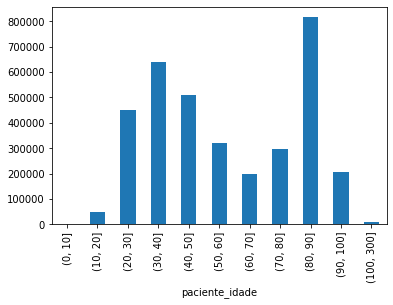

In [ ]:
df_vacinacao['paciente_idade'].groupby(pd.cut(df_vacinacao.paciente_idade, ranges_idade)).count().plot.bar()

### 4.1.3) Quantitativo total de vacinados por raça/etnia

In [ ]:
df_vacinacao['paciente_racaCor_valor'].value_counts()

BRANCA            1369708
SEM INFORMACAO    1115431
PARDA              508551
AMARELA            314209
PRETA              129471
INDIGENA            60464
Name: paciente_racaCor_valor, dtype: int64

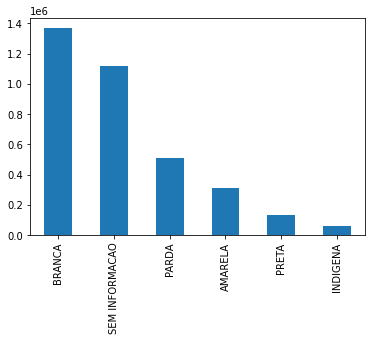

In [ ]:
df_vacinacao['paciente_racaCor_valor'].value_counts().plot.bar()

### 4.1.4) Quantitativo total de vacinados por grupo de categoria

In [ ]:
df_vacinacao['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             1937487
Faixa Etária                                       1343766
Povos Indígenas                                      85177
Pessoas de 60 anos ou mais institucionalizadas       69791
Pessoas com Deficiência                               8485
Povos e Comunidades Tradicionais                      7141
Forças de Segurança e Salvamento                      1291
Comorbidades                                           852
Pessoas em Situação de Rua                             218
Forças Armadas (membros ativos)                        183
Trabalhadores da Educação                              147
Funcionário do Sistema de Privação de Liberdade         98
População Privada de Liberdade                          34
Trabalhadores Industriais                               24
Trabalhadores Portuários                                 6
Name: vacina_categoria_nome, dtype: int64

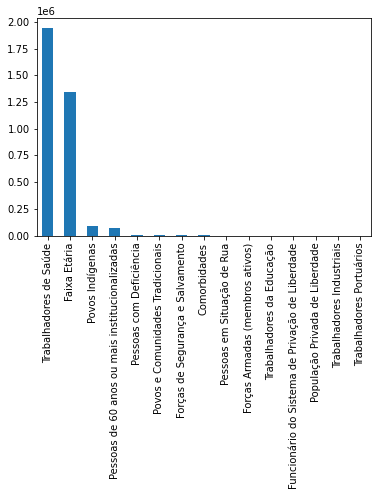

In [ ]:
df_vacinacao['vacina_categoria_nome'].value_counts().plot.bar()

### 4.1.5) Quantitativo total de vacinados por nome de vacina

In [ ]:
df_vacinacao['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          2313897
Vacina Covid-19 - Covishield                                 1183925
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer         12
Name: vacina_nome, dtype: int64

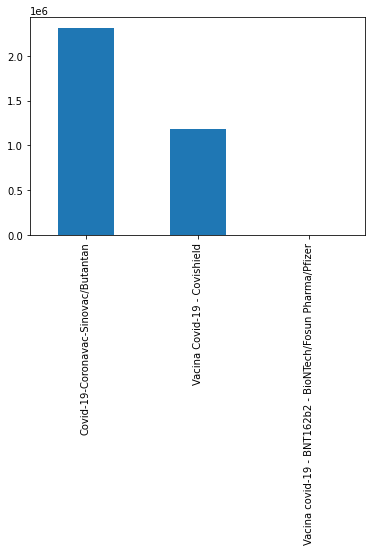

In [ ]:
df_vacinacao['vacina_nome'].value_counts().plot.bar()

## 4.2) O perfil dos vacinados na região sudeste

### 4.2.1) Quantitativo de vacinados na região sudeste por faixa de idade

In [ ]:
#df_sudeste['paciente_idade'].value_counts()
df_merge_sudeste['paciente_idade'].groupby(pd.cut(df_merge_sudeste.paciente_idade, ranges_idade)).count()

paciente_idade
(0, 10]          116
(10, 20]       33995
(20, 30]      339887
(30, 40]      500138
(40, 50]      405739
(50, 60]      264753
(60, 70]      158992
(70, 80]      214455
(80, 90]      709506
(90, 100]     181462
(100, 300]      6752
Name: paciente_idade, dtype: int64

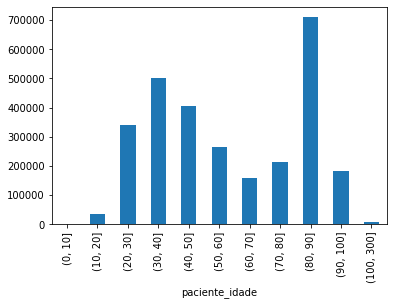

In [ ]:
#df_sudeste['paciente_idade'].value_counts().plot.bar()
df_merge_sudeste['paciente_idade'].groupby(pd.cut(df_merge_sudeste.paciente_idade, ranges_idade)).count().plot.bar()

## 4.3) O perfil dos estabelecimentos de saúde dos vacinados na região sudeste

### 4.3.1) Quantitativo de vacinados na região sudeste metropolitana por tipo de gestão do estabelecimento de saúde 
#### (M - Municipal, E - Estadual, D - Dupla)

In [ ]:
df_merge_sudeste_rm['tp_gestao'].value_counts()

M    1617082
E     120885
D      23297
Name: tp_gestao, dtype: int64

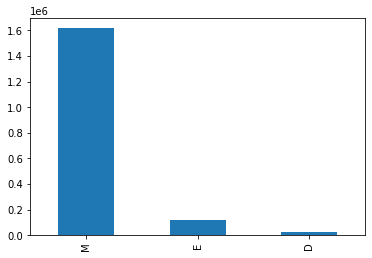

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla) - gráfico
df_merge_sudeste_rm['tp_gestao'].value_counts().plot.bar()

### 4.3.2) Quantitativo de vacinados na região sudeste metropolitana por tipo de unidade do estabelecimento de saúde 

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade
df_merge_sudeste_rm['ds_tipo_unidade'].value_counts()

CENTRO DE SAUDE/UNIDADE BASICA                                1234911
HOSPITAL GERAL                                                 341118
POLICLINICA                                                     47506
HOSPITAL ESPECIALIZADO                                          35273
CLINICA/CENTRO DE ESPECIALIDADE                                 25407
POSTO DE SAUDE                                                  18979
UNIDADE DE VIGILANCIA EM SAUDE                                  13311
PRONTO ATENDIMENTO                                              12070
UNIDADE MOVEL TERRESTRE                                          7867
CENTRAL DE GESTAO EM SAUDE                                       6522
PRONTO SOCORRO GERAL                                             4911
UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOLADO)               4038
CENTRO DE ATENCAO HEMOTERAPIA E OU HEMATOLOGICA                  3296
HOSPITAL/DIA - ISOLADO                                           1899
CENTRO DE ATENCAO PS

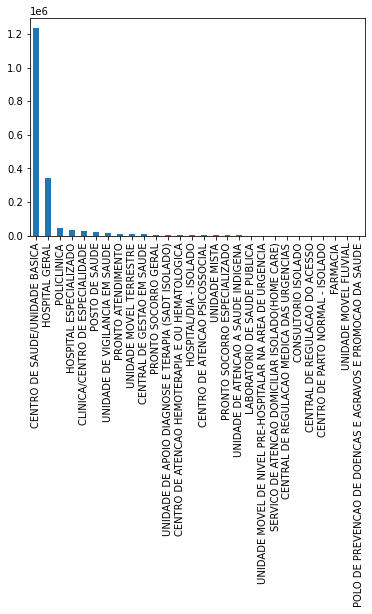

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade - gráfico
df_merge_sudeste_rm['ds_tipo_unidade'].value_counts().plot.bar()

### 4.3.3) Quantitativo de vacinados na região sudeste interiorana por tipo de gestão do estabelecimento de saúde 
#### (M - Municipal, E - Estadual, D - Dupla)

In [ ]:
df_merge_sudeste_int['tp_gestao'].value_counts()

M    932843
D     83434
E     38263
Name: tp_gestao, dtype: int64

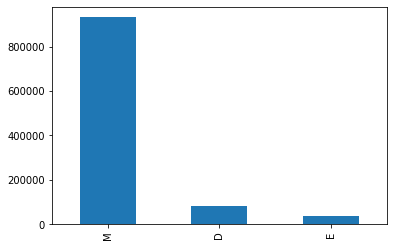

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla) - gráfico
df_merge_sudeste_int['tp_gestao'].value_counts().plot.bar()

### 4.3.4) Quantitativo de vacinados na região sudeste interiorana por tipo de unidade do estabelecimento de saúde

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade
df_merge_sudeste_int['ds_tipo_unidade'].value_counts()

CENTRO DE SAUDE/UNIDADE BASICA                               735557
HOSPITAL GERAL                                               110233
POLICLINICA                                                   56700
POSTO DE SAUDE                                                51616
CLINICA/CENTRO DE ESPECIALIDADE                               34534
UNIDADE DE VIGILANCIA EM SAUDE                                19910
CENTRAL DE GESTAO EM SAUDE                                    19875
HOSPITAL ESPECIALIZADO                                         7958
UNIDADE DE ATENCAO A SAUDE INDIGENA                            5572
PRONTO ATENDIMENTO                                             4711
UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOLADO)             2777
PRONTO SOCORRO GERAL                                           2050
UNIDADE MISTA                                                   895
UNIDADE MOVEL TERRESTRE                                         883
CONSULTORIO ISOLADO                             

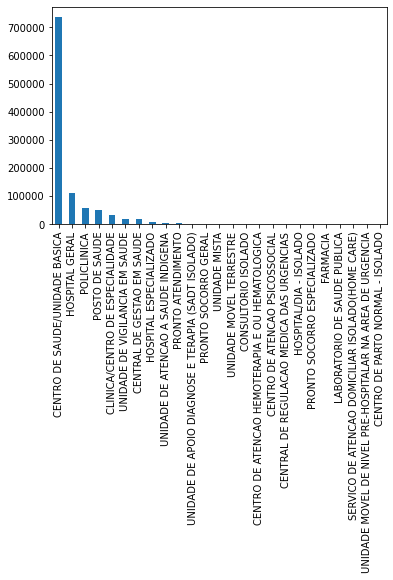

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade - gráfico
df_merge_sudeste_int['ds_tipo_unidade'].value_counts().plot.bar()

## 4.4) O perfil dos estabelecimentos de saúde dos vacinados na região norte

### 4.4.1) Quantitativo de vacinados na região norte metropolitana por tipo de gestão do estabelecimento de saúde 
#### (M - Municipal, E - Estadual, D - Dupla)

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla)
df_merge_norte_rm['tp_gestao'].value_counts()

M    240371
E     23576
D      5408
Name: tp_gestao, dtype: int64

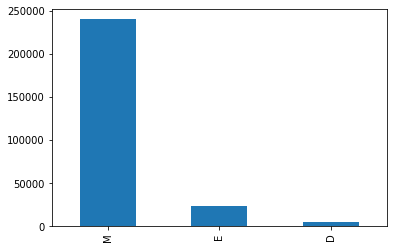

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla) - gráfico
df_merge_norte_rm['tp_gestao'].value_counts().plot.bar()

### 4.4.2) Quantitativo de vacinados na região norte metropolitana por tipo de unidade do estabelecimento de saúde

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade
df_merge_norte_rm['ds_tipo_unidade'].value_counts()

CENTRO DE SAUDE/UNIDADE BASICA                                  150242
UNIDADE DE VIGILANCIA EM SAUDE                                   48156
HOSPITAL GERAL                                                   33026
UNIDADE DE ATENCAO A SAUDE INDIGENA                              13551
POSTO DE SAUDE                                                    8155
HOSPITAL ESPECIALIZADO                                            4466
PRONTO ATENDIMENTO                                                3439
CENTRAL DE GESTAO EM SAUDE                                        2031
PRONTO SOCORRO ESPECIALIZADO                                      1722
CLINICA/CENTRO DE ESPECIALIDADE                                   1321
POLICLINICA                                                        782
PRONTO SOCORRO GERAL                                               542
UNIDADE MISTA                                                      487
CENTRAL DE REGULACAO MEDICA DAS URGENCIAS                          428
UNIDAD

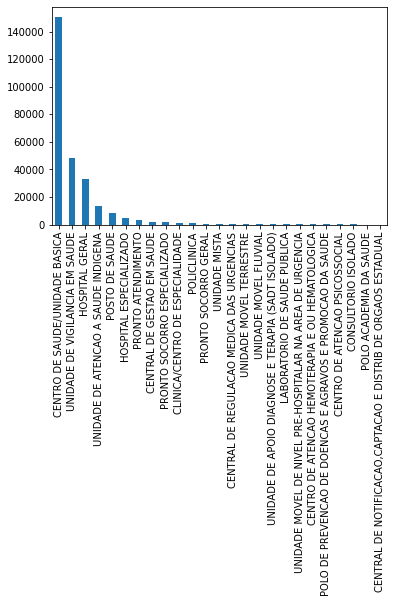

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade - gráfico
df_merge_norte_rm['ds_tipo_unidade'].value_counts().plot.bar()

### 4.4.3) Quantitativo de vacinados na região norte interiorana por tipo de gestão do estabelecimento de saúde 
#### (M - Municipal, E - Estadual, D - Dupla)

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla)
df_merge_norte_int['tp_gestao'].value_counts()

M    205580
D      8827
E      4535
Name: tp_gestao, dtype: int64

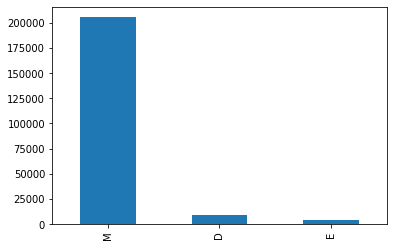

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla) - gráfico
df_merge_norte_int['tp_gestao'].value_counts().plot.bar()

### 4.4.4) Quantitativo de vacinados na região norte interiorana por tipo de unidade do estabelecimento de saúde

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade
df_merge_norte_int['ds_tipo_unidade'].value_counts()

CENTRO DE SAUDE/UNIDADE BASICA                                  102715
UNIDADE DE ATENCAO A SAUDE INDIGENA                              57855
HOSPITAL GERAL                                                   25314
POSTO DE SAUDE                                                    9809
UNIDADE DE VIGILANCIA EM SAUDE                                    8500
UNIDADE MISTA                                                     5105
CENTRAL DE GESTAO EM SAUDE                                        2959
UNIDADE MOVEL TERRESTRE                                           2048
CLINICA/CENTRO DE ESPECIALIDADE                                   1145
PRONTO ATENDIMENTO                                                 709
CENTRAL DE NOTIFICACAO,CAPTACAO E DISTRIB DE ORGAOS ESTADUAL       631
HOSPITAL ESPECIALIZADO                                             626
CONSULTORIO ISOLADO                                                452
PRONTO SOCORRO GERAL                                               353
UNIDAD

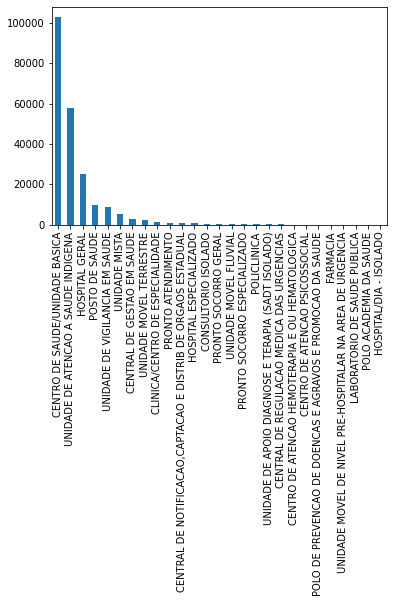

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade - gráfico
df_merge_norte_int['ds_tipo_unidade'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Idade
#df_norte['paciente_idade'].value_counts()
df_merge_norte['paciente_idade'].groupby(pd.cut(df_merge_norte.paciente_idade, ranges_idade)).count()

paciente_idade
(0, 10]          32
(10, 20]      10883
(20, 30]      72596
(30, 40]      91596
(40, 50]      73385
(50, 60]      39594
(60, 70]      32280
(70, 80]      72578
(80, 90]      78068
(90, 100]     15697
(100, 300]     1583
Name: paciente_idade, dtype: int64

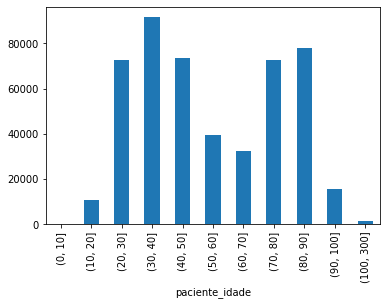

In [ ]:
# Quantitativo de Vacinados por Idade - Alterar para outro tipo de gráfico
#df_norte['paciente_idade'].value_counts().plot.bar()
df_merge_norte['paciente_idade'].groupby(pd.cut(df_merge_norte.paciente_idade, ranges_idade)).count().plot.bar()

## 4.5) O perfil dos vacinados nas regiões metropolitanas da região sudeste

### 4.5.1) Quantitativo de vacinados nas regiões metropolitanas da região sudeste por UF

In [ ]:
# Total de vacinados nas regiões metropolitanas por UF na região sudeste
df_merge_sudeste_rm['paciente_endereco_uf'].value_counts()

SP    1243675
RJ     319046
MG     146869
ES      51674
Name: paciente_endereco_uf, dtype: int64

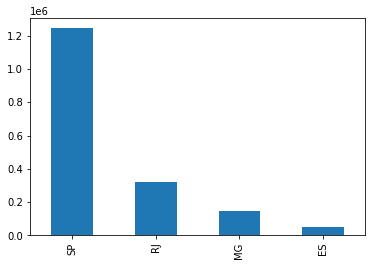

In [ ]:
# Total de vacinados por UF na região sudeste - gráfico
df_merge_sudeste_rm['paciente_endereco_uf'].value_counts().plot.bar()
#df_vacinacao['paciente_enumSexoBiologico'].value_counts().plot.bar()

### 4.5.2) Quantitativo de vacinados nas regiões metropolitanas da região sudeste por categoria

In [ ]:
# Total de vacinados da região sudeste por categoria
df_merge_sudeste_rm['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             932347
Faixa Etária                                       763709
Pessoas de 60 anos ou mais institucionalizadas      35318
Pessoas com Deficiência                              4252
Povos e Comunidades Tradicionais                     3150
Povos Indígenas                                      1996
Comorbidades                                          327
Pessoas em Situação de Rua                            196
Forças Armadas (membros ativos)                       156
Forças de Segurança e Salvamento                      144
Trabalhadores da Educação                              85
Funcionário do Sistema de Privação de Liberdade        52
Trabalhadores Industriais                              13
População Privada de Liberdade                          2
Name: vacina_categoria_nome, dtype: int64

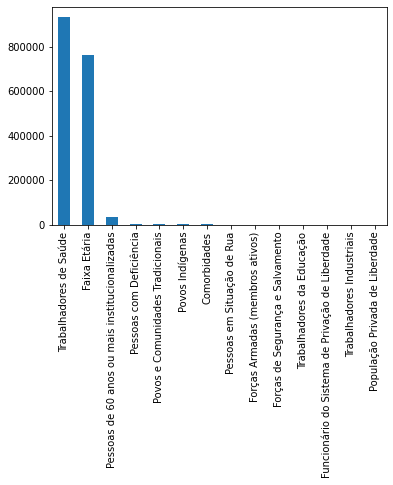

In [ ]:
# Total de vacinados da região sudeste por categoria - gráfico
df_merge_sudeste_rm['vacina_categoria_nome'].value_counts().plot.bar()

### 4.5.3) Quantitativo de vacinados nas regiões metropolitanas da região sudeste por sexo biológico

In [137]:
# Quantitativo de Vacinados por Sexo Biológico
df_merge_sudeste_rm['paciente_enumSexoBiologico'].value_counts()

F    1224348
M     536911
Name: paciente_enumSexoBiologico, dtype: int64

In [138]:
# Quantitativo de Vacinados por Sexo Biológico - gráfico
indexes = df_merge_sudeste_rm[df_merge_sudeste_rm['paciente_enumSexoBiologico'] == 'I'].index
df_merge_sudeste_rm = df_merge_sudeste_rm.drop(indexes)
df_merge_sudeste_rm['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [136]:
# Exibição do resultado em grafico de pizza
dataSud_RM_SB = df_merge_sudeste_rm['paciente_enumSexoBiologico'].value_counts()
labels = ['F', 'M']
# graficos
fig, ax = plt.subplots()
ax.pie(dataSud_RM_SB, labels=labels, autopct='%1.2f%%')
ax.axis('equal') # mantenha um circulo
fig.suptitle("Sexo Biológico dos Vacinados");

### 4.5.4) Quantitativo de vacinados nas regiões metropolitanas da região sudeste por raça

In [ ]:
# Quantitativo de Vacinados por Raça
df_merge_sudeste_rm['paciente_racaCor_valor'].value_counts()

SEM INFORMACAO    749080
BRANCA            631235
PARDA             189423
AMARELA           120735
PRETA              69280
INDIGENA            1506
Name: paciente_racaCor_valor, dtype: int64

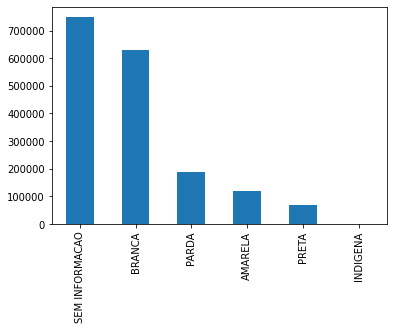

In [ ]:
# Quantitativo de Vacinados por Raça - gráfico
df_merge_sudeste_rm['paciente_racaCor_valor'].value_counts().plot.bar()

### 4.5.5) Quantitativo de vacinados nas regiões metropolitanas da região sudeste por nome de vacina

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina
df_merge_sudeste_rm['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan    1147301
Vacina Covid-19 - Covishield            613958
Name: vacina_nome, dtype: int64

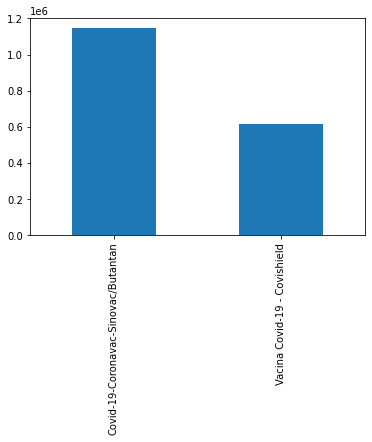

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina - gráfico
df_merge_sudeste_rm['vacina_nome'].value_counts().plot.bar()

### 4.5.6) Quantitativo de vacinados nas regiões metropolitanas da região sudeste por idade

In [ ]:
# Quantitativo de Vacinados por Idade
#df_merge_sudeste_rm['paciente_idade'].value_counts()
df_merge_sudeste_rm['paciente_idade'].groupby(pd.cut(df_merge_sudeste_rm.paciente_idade, ranges_idade)).count()

paciente_idade
(0, 10]           62
(10, 20]       19109
(20, 30]      184399
(30, 40]      286770
(40, 50]      244265
(50, 60]      160533
(60, 70]      114014
(70, 80]      151613
(80, 90]      485214
(90, 100]     111312
(100, 300]      3965
Name: paciente_idade, dtype: int64

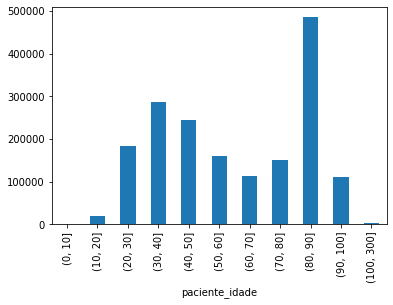

In [ ]:
# Quantitativo de Vacinados por Idade - Alterar para outro tipo de grafico
#df_merge_sudeste_rm['paciente_idade'].value_counts().plot.bar()
df_merge_sudeste_rm['paciente_idade'].groupby(pd.cut(df_merge_sudeste_rm.paciente_idade, ranges_idade)).count().plot.bar()

## 4.6) O perfil dos vacinados nas regiões metropolitanas da região norte

### 4.6.1) Quantitativo de vacinados nas regiões metropolitanas da região norte por UF

In [ ]:
# Total de vacinados nas regiões metropolitanas por UF na região sudeste
df_merge_norte_rm['paciente_endereco_uf'].value_counts()

AM    138074
PA     66543
TO     20700
RR     16109
AP     11530
AC      9663
RO      6736
Name: paciente_endereco_uf, dtype: int64

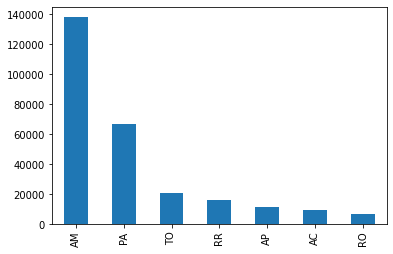

In [ ]:
# Total de vacinados por UF na região sudeste - gráfico
df_merge_norte_rm['paciente_endereco_uf'].value_counts().plot.bar()
#df_vacinacao['paciente_enumSexoBiologico'].value_counts().plot.bar()

### 4.6.2) Quantitativo de vacinados nas regiões metropolitanas da região norte por categoria

In [ ]:
# Total de vacinados da região sudeste por categoria
df_merge_norte_rm['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             132822
Faixa Etária                                       117405
Povos Indígenas                                     13532
Pessoas de 60 anos ou mais institucionalizadas       3288
Povos e Comunidades Tradicionais                      554
Forças de Segurança e Salvamento                      349
Pessoas com Deficiência                               136
Comorbidades                                          109
Funcionário do Sistema de Privação de Liberdade        23
População Privada de Liberdade                         14
Trabalhadores da Educação                               7
Forças Armadas (membros ativos)                         5
Trabalhadores Industriais                               1
Trabalhadores Portuários                                1
Name: vacina_categoria_nome, dtype: int64

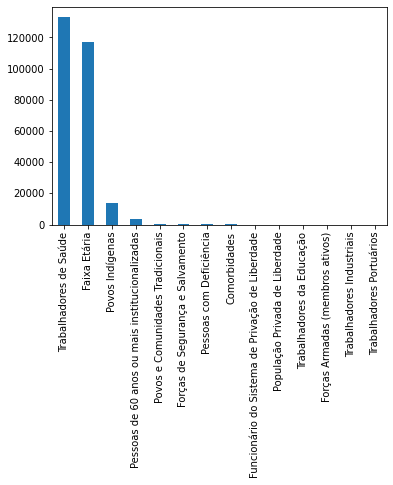

In [ ]:
# Total de vacinados da região sudeste por categoria - gráfico
df_merge_norte_rm['vacina_categoria_nome'].value_counts().plot.bar()

### 4.6.3) Quantitativo de vacinados nas regiões metropolitanas da região norte por sexo biológico

In [139]:
# Quantitativo de Vacinados por Sexo Biológico
df_merge_norte_rm['paciente_enumSexoBiologico'].value_counts()

F    169836
M     99519
Name: paciente_enumSexoBiologico, dtype: int64

In [142]:
# Quantitativo de Vacinados por Sexo Biológico - gráfico
df_merge_norte_rm['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [141]:
# Exibição do resultado em grafico de pizza
dataNor_RM_SB = df_merge_norte_rm['paciente_enumSexoBiologico'].value_counts()
labels = ['F', 'M']
# graficos
fig, ax = plt.subplots()
ax.pie(dataNor_RM_SB, labels=labels, autopct='%1.2f%%')
ax.axis('equal') # mantenha um circulo
fig.suptitle("Sexo Biológico dos Vacinados");

### 4.6.4) Quantitativo de vacinados nas regiões metropolitanas da região norte por raça

In [ ]:
# Quantitativo de Vacinados por Raça
df_merge_norte_rm['paciente_racaCor_valor'].value_counts()

PARDA             110135
SEM INFORMACAO     67431
AMARELA            51021
BRANCA             29799
INDIGENA            6023
PRETA               4946
Name: paciente_racaCor_valor, dtype: int64

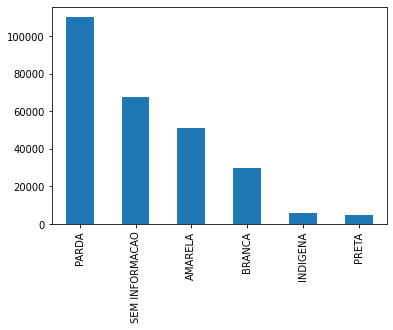

In [ ]:
# Quantitativo de Vacinados por Raça - gráfico
df_merge_norte_rm['paciente_racaCor_valor'].value_counts().plot.bar()

### 4.6.5) Quantitativo de vacinados nas regiões metropolitanas da região norte por nome de vacina

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina
df_merge_norte_rm['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan    163400
Vacina Covid-19 - Covishield           105955
Name: vacina_nome, dtype: int64

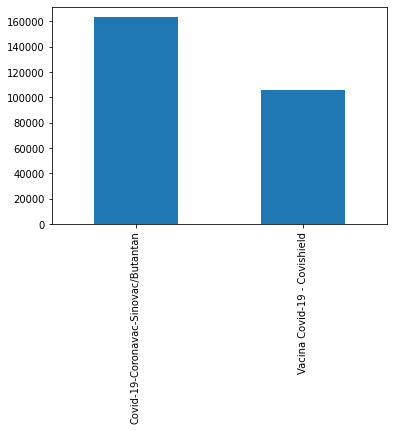

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina - gráfico
df_merge_norte_rm['vacina_nome'].value_counts().plot.bar()

### 4.6.6) Quantitativo de vacinados nas regiões metropolitanas da região norte por idade

In [ ]:
# Quantitativo de Vacinados por Idade
#df_merge_sudeste_rm['paciente_idade'].value_counts()
df_merge_norte_rm['paciente_idade'].groupby(pd.cut(df_merge_norte_rm.paciente_idade, ranges_idade)).count()

paciente_idade
(0, 10]           4
(10, 20]       3044
(20, 30]      33010
(30, 40]      44356
(40, 50]      38546
(50, 60]      20793
(60, 70]      21261
(70, 80]      51706
(80, 90]      47370
(90, 100]      8602
(100, 300]      663
Name: paciente_idade, dtype: int64

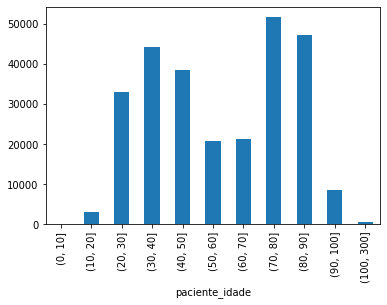

In [ ]:
# Quantitativo de Vacinados por Idade - Alterar para outro tipo de grafico
#df_merge_sudeste_rm['paciente_idade'].value_counts().plot.bar()
df_merge_norte_rm['paciente_idade'].groupby(pd.cut(df_merge_norte_rm.paciente_idade, ranges_idade)).count().plot.bar()

## 4.7) O perfil dos vacinados nas regiões interioranas da região sudeste

### 4.7.1) Quantitativo de vacinados nas regiões interioranas da região sudeste por UF

In [ ]:
# Total de vacinados nas regiões interioranas por UF na região sudeste
df_merge_sudeste_int['paciente_endereco_uf'].value_counts()

SP    613843
MG    305626
RJ     76349
ES     58722
Name: paciente_endereco_uf, dtype: int64

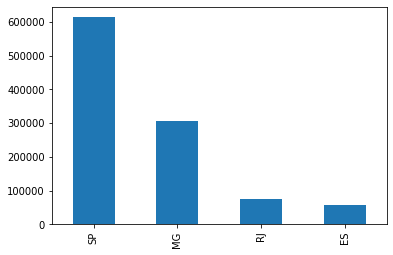

In [ ]:
# Total de vacinados nas regiões interioranas por UF na região sudeste - gráfico
df_merge_sudeste_int['paciente_endereco_uf'].value_counts().plot.bar()
#df_vacinacao['paciente_enumSexoBiologico'].value_counts().plot.bar()

### 4.7.2) Quantitativo de vacinados nas regiões interioranas da região sudeste por categoria

In [ ]:
# Total de vacinados nas regiões interioranas da região sudeste por categoria
df_merge_sudeste_int['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             646073
Faixa Etária                                       360894
Pessoas de 60 anos ou mais institucionalizadas      24597
Povos Indígenas                                      7604
Pessoas com Deficiência                              3510
Povos e Comunidades Tradicionais                     2865
Forças de Segurança e Salvamento                      465
Comorbidades                                          212
Trabalhadores da Educação                              34
Trabalhadores Industriais                              10
Pessoas em Situação de Rua                              8
Forças Armadas (membros ativos)                         7
Funcionário do Sistema de Privação de Liberdade         5
Trabalhadores Portuários                                4
População Privada de Liberdade                          1
Name: vacina_categoria_nome, dtype: int64

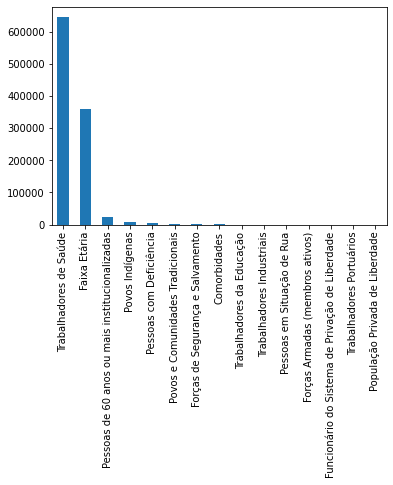

In [ ]:
# Total de vacinados nas regiões interioranas da região sudeste por categoria - gráfico
df_merge_sudeste_int['vacina_categoria_nome'].value_counts().plot.bar()

### 4.7.3) Quantitativo de vacinados nas regiões interioranas da região sudeste por sexo biológico

In [143]:
# Quantitativo de Vacinados por Sexo Biológico
df_merge_sudeste_int['paciente_enumSexoBiologico'].value_counts()

F    713381
M    341158
Name: paciente_enumSexoBiologico, dtype: int64

In [144]:
# Quantitativo de Vacinados por Sexo Biológico - gráfico
indexes = df_merge_sudeste_int[df_merge_sudeste_int['paciente_enumSexoBiologico'] == 'I'].index
df_merge_sudeste_int = df_merge_sudeste_int.drop(indexes)
df_merge_sudeste_int['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [126]:
# Exibição do resultado em grafico de pizza
dataSud_INT_SB = df_merge_sudeste_int['paciente_enumSexoBiologico'].value_counts()
labels = ['F', 'M']
# graficos
fig, ax = plt.subplots()
ax.pie(dataSud_INT_SB, labels=labels, autopct='%1.2f%%')
ax.axis('equal') # mantenha um circulo
fig.suptitle("Sexo Biológico dos Vacinados");

### 4.7.4) Quantitativo de vacinados nas regiões interioranas da região sudeste por raça

In [ ]:
# Quantitativo de Vacinados por Raça
df_merge_sudeste_int['paciente_racaCor_valor'].value_counts()

BRANCA            615996
SEM INFORMACAO    206870
PARDA             107406
AMARELA            74557
PRETA              42292
INDIGENA            7418
Name: paciente_racaCor_valor, dtype: int64

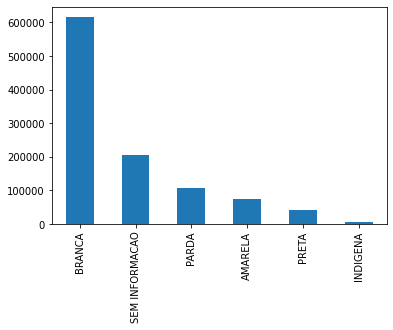

In [ ]:
# Quantitativo de Vacinados por Raça - gráfico
df_merge_sudeste_int['paciente_racaCor_valor'].value_counts().plot.bar()

### 4.7.5) Quantitativo de vacinados nas regiões interioranas da região sudeste por nome de vacina

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina
df_merge_sudeste_int['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          712529
Vacina Covid-19 - Covishield                                 342000
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer        10
Name: vacina_nome, dtype: int64

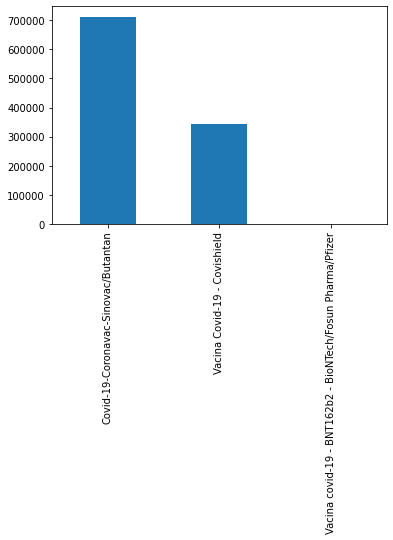

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina - gráfico
df_merge_sudeste_int['vacina_nome'].value_counts().plot.bar()

### 4.7.6) Quantitativo de vacinados nas regiões interioranas da região sudeste por idade

In [ ]:
# Quantitativo de Vacinados por Idade
#df_merge_sudeste_rm['paciente_idade'].value_counts()
df_merge_sudeste_int['paciente_idade'].groupby(pd.cut(df_merge_sudeste_int.paciente_idade, ranges_idade)).count()

paciente_idade
(0, 10]           54
(10, 20]       14886
(20, 30]      155488
(30, 40]      213368
(40, 50]      161474
(50, 60]      104219
(60, 70]       44977
(70, 80]       62839
(80, 90]      224291
(90, 100]      70150
(100, 300]      2787
Name: paciente_idade, dtype: int64

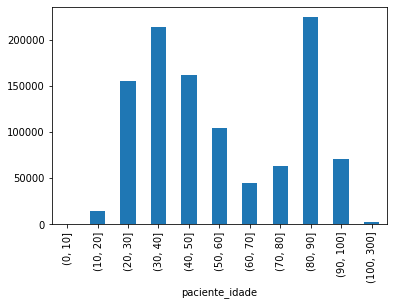

In [ ]:
# Quantitativo de Vacinados por Idade - Alterar para outro tipo de grafico
#df_merge_sudeste_rm['paciente_idade'].value_counts().plot.bar()
df_merge_sudeste_int['paciente_idade'].groupby(pd.cut(df_merge_sudeste_int.paciente_idade, ranges_idade)).count().plot.bar()

## 4.8) O perfil dos vacinados nas regiões interioranas da região norte

### 4.8.1) Quantitativo de vacinados nas regiões interioranas da região norte por UF

In [ ]:
# Total de vacinados nas regiões interioranas por UF na região norte
df_merge_norte_int['paciente_endereco_uf'].value_counts()

AM    73240
PA    73128
RO    26969
TO    24947
AC    11608
AP     5663
RR     3387
Name: paciente_endereco_uf, dtype: int64

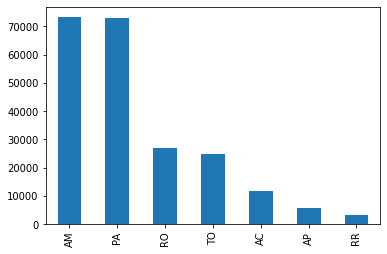

In [ ]:
# Total de vacinados nas regiões interioranas por UF na região norte - gráfico
df_merge_norte_int['paciente_endereco_uf'].value_counts().plot.bar()
#df_vacinacao['paciente_enumSexoBiologico'].value_counts().plot.bar()

### 4.8.2) Quantitativo de vacinados nas regiões interioranas da região norte por categoria

In [ ]:
# Total de vacinados nas regiões interioranas da região sudeste por categoria
df_merge_norte_int['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             97064
Povos Indígenas                                    56345
Faixa Etária                                       55235
Pessoas de 60 anos ou mais institucionalizadas      2459
Forças de Segurança e Salvamento                     256
Comorbidades                                         182
Pessoas com Deficiência                              129
Povos e Comunidades Tradicionais                      19
População Privada de Liberdade                        10
Funcionário do Sistema de Privação de Liberdade        9
Trabalhadores da Educação                              7
Forças Armadas (membros ativos)                        7
Name: vacina_categoria_nome, dtype: int64

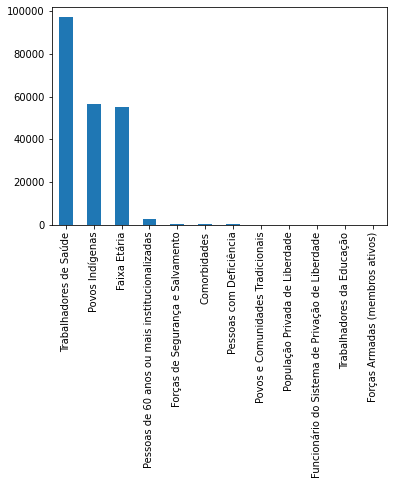

In [ ]:
# Total de vacinados nas regiões interioranas da região norte por categoria - gráfico
df_merge_norte_int['vacina_categoria_nome'].value_counts().plot.bar()

### 4.8.3) Quantitativo de vacinados nas regiões interioranas da região norte por sexo biológico

In [145]:
# Quantitativo de Vacinados por Sexo Biológico
df_merge_norte_int['paciente_enumSexoBiologico'].value_counts()

F    121591
M     97351
Name: paciente_enumSexoBiologico, dtype: int64

In [149]:
# Quantitativo de Vacinados por Sexo Biológico - gráfico
df_merge_norte_int['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [147]:
# Exibição do resultado em grafico de pizza
dataNor_INT_SB = df_merge_norte_int['paciente_enumSexoBiologico'].value_counts()
labels = ['F', 'M']
# graficos
fig, ax = plt.subplots()
ax.pie(dataNor_INT_SB, labels=labels, autopct='%1.2f%%')
ax.axis('equal') # mantenha um circulo
fig.suptitle("Sexo Biológico dos Vacinados");

### 4.8.4) Quantitativo de vacinados nas regiões interioranas da região norte por raça

In [ ]:
# Quantitativo de Vacinados por Raça
df_merge_norte_int['paciente_racaCor_valor'].value_counts()

PARDA             71624
AMARELA           43731
INDIGENA          42261
SEM INFORMACAO    28058
BRANCA            27185
PRETA              6083
Name: paciente_racaCor_valor, dtype: int64

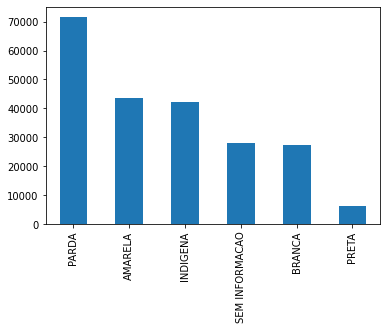

In [ ]:
# Quantitativo de Vacinados por Raça - gráfico
df_merge_norte_int['paciente_racaCor_valor'].value_counts().plot.bar()

### 4.8.5) Quantitativo de vacinados nas regiões interioranas da região norte por nome de vacina

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina
df_merge_norte_int['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          155243
Vacina Covid-19 - Covishield                                  63697
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer         2
Name: vacina_nome, dtype: int64

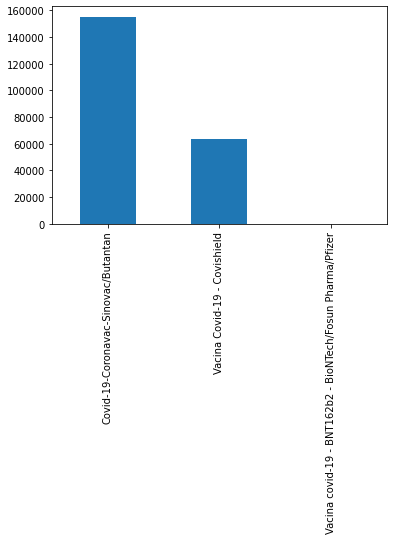

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina - gráfico
df_merge_norte_int['vacina_nome'].value_counts().plot.bar()

### 4.8.6) Quantitativo de vacinados nas regiões interioranas da região norte por idade

In [ ]:
# Quantitativo de Vacinados por Idade
#df_merge_sudeste_rm['paciente_idade'].value_counts()
df_merge_norte_int['paciente_idade'].groupby(pd.cut(df_merge_norte_int.paciente_idade, ranges_idade)).count()

paciente_idade
(0, 10]          28
(10, 20]       7839
(20, 30]      39586
(30, 40]      47240
(40, 50]      34839
(50, 60]      18801
(60, 70]      11019
(70, 80]      20872
(80, 90]      30698
(90, 100]      7095
(100, 300]      920
Name: paciente_idade, dtype: int64

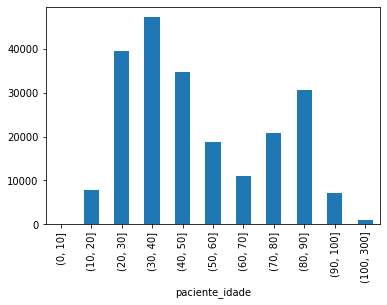

In [ ]:
# Quantitativo de Vacinados por Idade - Alterar para outro tipo de grafico
#df_merge_sudeste_rm['paciente_idade'].value_counts().plot.bar()
df_merge_norte_int['paciente_idade'].groupby(pd.cut(df_merge_norte_int.paciente_idade, ranges_idade)).count().plot.bar()

## 4.9) Vacinados fora do Municipio


### 4.9.1) Identificar pacientes que foram vacinados fora de seu município de residência

In [ ]:
df_vacinacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3497834 entries, 2244347 to 6826627
Data columns (total 26 columns):
 #   Column                                    Dtype 
---  ------                                    ----- 
 0   document_id                               object
 1   paciente_id                               object
 2   paciente_idade                            int64 
 3   paciente_dataNascimento                   object
 4   paciente_enumSexoBiologico                object
 5   paciente_racaCor_codigo                   int64 
 6   paciente_racaCor_valor                    object
 7   paciente_endereco_coIbgeMunicipio         int64 
 8   paciente_endereco_coPais                  int64 
 9   paciente_endereco_nmMunicipio             object
 10  paciente_endereco_nmPais                  object
 11  paciente_endereco_uf                      object
 12  paciente_nacionalidade_enumNacionalidade  object
 13  estabelecimento_valor                     int64 
 14  estabelecime

In [ ]:
# Observar métricas do campo coIbgeMunicipio
df_vacinacao.paciente_endereco_coIbgeMunicipio.describe()

count    3.497834e+06
mean     3.114138e+05
std      7.873361e+04
min      0.000000e+00
25%      3.146300e+05
50%      3.508400e+05
75%      3.548000e+05
max      9.999990e+05
Name: paciente_endereco_coIbgeMunicipio, dtype: float64

In [ ]:
print(len(df_vacinacao[df_vacinacao.paciente_endereco_coIbgeMunicipio == 0]))       # Municipio de residência não informado
print(len(df_vacinacao[df_vacinacao.paciente_endereco_coIbgeMunicipio == 999999]))  # Município de residência inválido

18055
631


In [ ]:
# Criação de coluna booleana para identificar se paciente foi vacinado fora seu município de residência (paciente_vacinado_fora_mun), que receberá os valores:
#    "1" se município de residência do paciente (paciente_endereco_coIbgeMunicipio) <> município do estabelecimento de vacinação (estabelecimento_municipio_codigo)
#    "0" se município de residência do paciente (paciente_endereco_coIbgeMunicipio) = município do estabelecimento de vacinação (estabelecimento_municipio_codigo)
# Para as tuplas onde não existe informação sobre o município de residência do paciente (o - zero) ou o código do município é inválido (999999), a nova coluna, para manter a consistência, será preenchida com NaN 

df_vacinacao.loc[(df_vacinacao.paciente_endereco_coIbgeMunicipio != df_vacinacao.estabelecimento_municipio_codigo),'paciente_vacinado_fora_mun'] = 1   # Pacientes vacinados fora do município de residência
df_vacinacao.loc[(df_vacinacao.paciente_endereco_coIbgeMunicipio == df_vacinacao.estabelecimento_municipio_codigo),'paciente_vacinado_fora_mun'] = 0   # Pacientes vacinados em seu município de residência
#df_vacinacao.loc[(df_vacinacao.paciente_endereco_coIbgeMunicipio.isna()),'paciente_vacinado_fora_mun'] = np.nan                                       # Pacientes onde não há informação sobre o município de residência
df_vacinacao.loc[((df_vacinacao.paciente_endereco_coIbgeMunicipio == 0) | (df_vacinacao.paciente_endereco_coIbgeMunicipio == 999999)),'paciente_vacinado_fora_mun'] = np.nan                                          # Pacientes onde não há informação sobre o município de residência

# Criação de coluna que identifica se o estado de residência do vacinado é o mesmo que o estado onde foi vacinado, que receberá os valores:
#    "1" se estado de residência do paciente (paciente_endereco_uf) =  estado do estabelecimento de vacinação (estabelecimento_uf)
#    "0" se estado de residência do paciente (paciente_endereco_uf) = estado do estabelecimento de vacinação (estabelecimento_uf)
# Para as tuplas onde não existe informação sobre o estado de residência do paciente (Nan) ou ou o código do município é inválido (999999), a nova coluna, para manter a consistência, será preenchida com NaN 

df_vacinacao.loc[(df_vacinacao.paciente_endereco_uf == df_vacinacao.estabelecimento_uf),'paciente_vacinado_mesma_UF'] = 1   # Pacientes vacinados em seu estado de residência
df_vacinacao.loc[(df_vacinacao.paciente_endereco_uf != df_vacinacao.estabelecimento_uf),'paciente_vacinado_mesma_UF'] = 0   # Pacientes vacinados fora de seu estado de residência
df_vacinacao.loc[((df_vacinacao.paciente_endereco_uf.isna()) | (df_vacinacao.paciente_endereco_coIbgeMunicipio == 999999)),'paciente_vacinado_mesma_UF'] = np.nan                                     # Pacientes onde não há informação sobre o estado de residência



In [ ]:
# Na listagem abaixo, pode-se observar que as colunas 'paciente_vacinado_fora_mun' e 'paciente_vacinado_mesma_UF' foram adicionadas
# As novas colunas contém uma quantidade menor de registros preenchidos (3479154) que o total de registros do dataset (3497840) 
# Isso ocorre porque para um conjunto de vacinados, as informações sobre residência não foram registradas no dataset ou estavam inválidas.
# Para a análise de vacinados fora do município serão considerados apenas aqueles que possuem informação de município de residência válida.
df_vacinacao.count()

document_id                                 3497834
paciente_id                                 3497834
paciente_idade                              3497834
paciente_dataNascimento                     3497834
paciente_enumSexoBiologico                  3497834
paciente_racaCor_codigo                     3497834
paciente_racaCor_valor                      3497834
paciente_endereco_coIbgeMunicipio           3497834
paciente_endereco_coPais                    3497834
paciente_endereco_nmMunicipio               3479812
paciente_endereco_nmPais                    3479843
paciente_endereco_uf                        3479779
paciente_nacionalidade_enumNacionalidade    3492806
estabelecimento_valor                       3497834
estabelecimento_municipio_codigo            3497834
estabelecimento_municipio_nome              3497834
estabelecimento_uf                          3497834
vacina_grupoAtendimento_codigo              3497834
vacina_grupoAtendimento_nome                3454700
vacina_categ

### 4.9.2) Calcular quantidade de vacinados por município

In [ ]:
# Dataframe com a quantidade total de vacinados fora do município de resiência e a quatidade total de vacinados por município 
df_fora_mun_gr = df_vacinacao.groupby(['estabelecimento_municipio_codigo','estabelecimento_municipio_nome','estabelecimento_uf']).agg({'paciente_vacinado_fora_mun': np.sum, 'document_id': np.size})
df_fora_mun_gr

,,,paciente_vacinado_fora_mun,document_id
estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,,
110001,ALTA FLORESTA D'OESTE,RO,108.0,1115
110002,ARIQUEMES,RO,209.0,1802
110003,CABIXI,RO,24.0,159
110004,CACOAL,RO,1002.0,4441
110005,CEREJEIRAS,RO,52.0,450
...,...,...,...,...
355700,VOTORANTIM,SP,1917.0,3711
355710,VOTUPORANGA,SP,1651.0,7423
355715,ZACARIAS,SP,13.0,88


In [ ]:
# Inclusão de coluna no dataframe com o % de vacinados por município que não habitavam em seu local de residência.

df_fora_mun_gr.paciente_vacinado_fora_mun = df_fora_mun_gr.paciente_vacinado_fora_mun.astype(int)                 # Ajusta tipo da coluna paciente_vacinado_fora_mun

df_fora_mun_gr['perc_fora_mun'] = (df_fora_mun_gr['paciente_vacinado_fora_mun']/df_fora_mun_gr['document_id'])*100  # Calculo do % de vacinados por minucípio

In [ ]:
# Informações sobre o dataframe df_fora_mun_gr

df_fora_mun_gr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2094 entries, (110001, "ALTA FLORESTA D'OESTE", 'RO') to (355730, 'ESTIVA GERBI', 'SP')
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   paciente_vacinado_fora_mun  2094 non-null   int64  
 1   document_id                 2094 non-null   int64  
 2   perc_fora_mun               2094 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 92.2+ KB


### 4.9.3) Análises

In [ ]:
#Avaliação de algumas métricas sobre os vacinados fora do município

df_fora_mun_gr.describe()

,paciente_vacinado_fora_mun,document_id,perc_fora_mun
count,2094.000000,2094.000000,2094.000000
mean,354.100764,1670.407832,19.087923
std,2756.353156,14488.823799,9.105172
min,0.000000,1.000000,0.000000
25%,24.000000,146.000000,12.740855
50%,51.000000,302.000000,17.382997
75%,136.000000,781.000000,23.742733
max,111874.000000,573517.000000,59.226190


In [ ]:
# Redefinindo o indice do dataset, levando as colunas do indice multi-nivel para o dataframe
df_fora_mun = df_fora_mun_gr.reset_index()
df_fora_mun

,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,paciente_vacinado_fora_mun,document_id,perc_fora_mun
0,110001,ALTA FLORESTA D'OESTE,RO,108,1115,9.686099
1,110002,ARIQUEMES,RO,209,1802,11.598224
2,110003,CABIXI,RO,24,159,15.094340
3,110004,CACOAL,RO,1002,4441,22.562486
4,110005,CEREJEIRAS,RO,52,450,11.555556
...,...,...,...,...,...,...
2089,355700,VOTORANTIM,SP,1917,3711,51.657235
2090,355710,VOTUPORANGA,SP,1651,7423,22.241681
2091,355715,ZACARIAS,SP,13,88,14.772727
2092,355720,CHAVANTES,SP,49,337,14.540059


In [ ]:
# Ordenar o dataframe pelos municípios que mais vacinaram pessoas que residem fora do município
df_fora_qtde = df_fora_mun.sort_values('paciente_vacinado_fora_mun', ascending=False)
# df_fora_qtde[['estabelecimento_municipio_nome', 'estabelecimento_uf', 'paciente_vacinado_fora_mun']].head(20)
df_fora_qtde.head(20)

,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,paciente_vacinado_fora_mun,document_id,perc_fora_mun
2012,355030,SAO PAULO,SP,111874,573517,19.506658
1427,330455,RIO DE JANEIRO,RJ,27942,254653,10.972578
513,310620,BELO HORIZONTE,MG,25315,92629,27.329454
1994,354870,SAO BERNARDO DO CAMPO,SP,14723,39447,37.323497
1558,350950,CAMPINAS,SP,14645,63235,23.159643
110,130260,MANAUS,AM,13852,123824,11.186846
1984,354780,SANTO ANDRE,SP,13041,38916,33.510638
1992,354850,SANTOS,SP,12469,37020,33.681794
1362,320530,VITORIA,ES,10884,24849,43.800555
1662,351880,GUARULHOS,SP,9971,39812,25.045212


In [ ]:
# Ordenar o dataframe pelos municípios que mais vacinaram pessoas que residem fora do município proporcionalmente em relação à população vacinada
df_fora_perc = df_fora_mun.sort_values('perc_fora_mun', ascending=False)
#df_fora_perc[['estabelecimento_municipio_nome', 'estabelecimento_uf', 'perc_fora_mun']].head(20)
df_fora_perc.head(20)

,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,paciente_vacinado_fora_mun,document_id,perc_fora_mun
277,150780,SENADOR JOSE PORFIRIO,PA,199,336,59.226190
1514,350570,BARUERI,SP,6377,11186,57.008761
1403,330285,MESQUITA,RJ,3488,6352,54.911839
160,150085,ANAPU,PA,233,425,54.823529
957,314480,NOVA LIMA,MG,3030,5552,54.574928
624,311640,CLARAVAL,MG,66,122,54.098361
1704,352220,ITAPECERICA DA SERRA,SP,2566,4864,52.754934
1978,354730,SANTANA DE PARNAIBA,SP,2012,3822,52.642595
1275,317120,VESPASIANO,MG,533,1025,52.000000
2089,355700,VOTORANTIM,SP,1917,3711,51.657235


In [ ]:
# Códigos dos cinco municípios com maior quantidade de vacinados fora de seu município de residência em números absolutos e 
# em percentuais de vacinados para realização de análises mais detalhadas

sr_top5_qtde = df_fora_qtde.iloc[0:5,0:3]   # Código dos 5 municípios com maior número de vacinados fora de seu município de residência
sr_top5_perc = df_fora_perc.iloc[0:5,0:3]   # Código dos 5 municípios com maior percentual de vacinados fora de seu município de residência

print(sr_top5_qtde)
print(sr_top5_perc)

      estabelecimento_municipio_codigo  ... estabelecimento_uf
2012                            355030  ...                 SP
1427                            330455  ...                 RJ
513                             310620  ...                 MG
1994                            354870  ...                 SP
1558                            350950  ...                 SP

[5 rows x 3 columns]
      estabelecimento_municipio_codigo  ... estabelecimento_uf
277                             150780  ...                 PA
1514                            350570  ...                 SP
1403                            330285  ...                 RJ
160                             150085  ...                 PA
957                             314480  ...                 MG

[5 rows x 3 columns]


In [ ]:
# Dataframe com vacinados fora de seu município de residência dos 5 municípios com maiores percentuais de vacinados fora de seu município de residência
vacinacao_mun_top5_perc = df_vacinacao.loc[(df_vacinacao['estabelecimento_municipio_codigo'].isin(sr_top5_perc.values)) & (df_vacinacao['paciente_vacinado_fora_mun']==1)]

vacinacao_mun_top5_perc

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,paciente_vacinado_fora_mun,paciente_vacinado_mesma_UF
1029695,97e7cbfe-cb62-4b5d-ace2-c125f5a870aa-i0b0,00001138697adba6248b948c0c34a09cda95077197bd07...,41,1979-08-27,M,1,BRANCA,352250,10,ITAPEVI,BRASIL,SP,B,7136889,350570,BARUERI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-25T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-25 14:01:50,1.0,1.0
1055070,62654969-2051-4894-8303-c2720ddbf639-i0b0,000a60d085a8c8166b07462aad4cbb3f2963cb53834128...,46,1974-05-28,M,99,SEM INFORMACAO,351060,10,CARAPICUIBA,BRASIL,SP,B,2023962,350570,BARUERI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-23T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-23 03:00:00,1.0,1.0
2874568,324e807e-4222-4f2e-90b0-b8374ad2ed8f-i0b0,000e7fa01541571756898bd4fbbb5e764c27f264759f2e...,45,1975-05-16,M,99,SEM INFORMACAO,355030,10,SAO PAULO,BRASIL,SP,B,2023962,350570,BARUERI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 15:01:00,1.0,1.0
369260,5c2c7518-1b2b-4ae0-a725-27347e88ac54-i0b0,00160478a432d8853ba615b5e6f5583e5325974979908c...,33,1987-06-11,F,99,SEM INFORMACAO,354730,10,SANTANA DE PARNAIBA,BRASIL,SP,B,2023962,350570,BARUERI,SP,926,Outros,9,Trabalhadores de Saúde,Sinovac,2021-02-22T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 03:00:00,1.0,1.0
6619160,2717d890-67f8-4b5d-b9b9-a5c7c39f3ae9-i0b0,001eea88bee81689ada772815b8a6413c2ff7df353a384...,26,1994-04-21,M,2,PRETA,315390,10,RAPOSOS,BRASIL,MG,B,2117401,314480,NOVA LIMA,MG,926,Outros,9,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-26T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-31 17:44:24,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638966,dd729676-ef78-4466-a5f6-6157ad46fefc-i0b0,ffe44bd138c1a694343b5f83cbb4523a80159a0611410e...,22,1998-02-02,M,1,BRANCA,352940,10,MAUA,BRASIL,SP,B,2023962,350570,BARUERI,SP,926,Outros,9,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-02-01T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-01 05:02:08,1.0,1.0
4294424,5d041c04-7b85-42c9-8562-a9a21706b4f4-i0b0,ffed7e324619c721dc9235c35d0ab0715bbba5ae7c0cb2...,41,1980-01-30,F,99,SEM INFORMACAO,310900,10,BRUMADINHO,BRASIL,MG,B,2117401,314480,NOVA LIMA,MG,912,Médico,9,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-03T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-04 15:12:40,1.0,1.0
1734639,f073de93-fa04-484f-8cad-82adc22625c6-i0b0,fff1510dac7e65142f02429e3c066666d5ab65fd19335d...,23,1997-10-10,F,99,SEM INFORMACAO,330350,10,NOVA IGUACU,BRASIL,RJ,B,2696525,330285,MESQUITA,RJ,0,NaN,0,NaN,SERUM INSTITUTE OF INDIA LTD,2021-01-25T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 14:08:01,1.0,1.0
6108782,9b09ec98-caab-4a07-bb8d-cd3fed645573-i0b0,fff6431d323c4718ef72b797b03a2337a59c2d29fd0786...,82,1938-03-23,F,99,SEM INFORMACAO,330455,10,RIO DE JANEIRO,BRASIL,RJ,B,2696525,330285,MESQUITA,RJ,1102,Pessoas com Deficiências Permanente Grave,11,Pessoas com Deficiência,FUNDACAO OSWALDO CRUZ,2021-02-01T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-03 19:24:16,1.0,1.0


#### 4.9.3.1) Vacinados que residem fora do município de vacinação: quantos residem em outro estado?

In [ ]:
# Análise da relação "residentes em outro estado X residentes no mesmo estado" para o conjunto de municípios das regiões norte e sudeste

df_vacinacao.loc[(df_vacinacao['paciente_vacinado_fora_mun']==1)]['paciente_vacinado_mesma_UF'].value_counts()

1.0    615580
0.0    125907
Name: paciente_vacinado_mesma_UF, dtype: int64

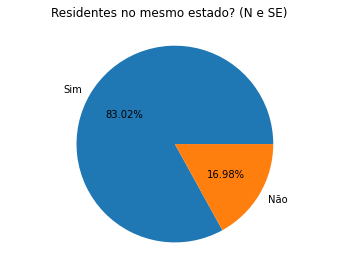

In [ ]:
# Exibição do resultado em grafico de pizza
datax = df_vacinacao.loc[(df_vacinacao['paciente_vacinado_fora_mun']==1)]['paciente_vacinado_mesma_UF'].value_counts()
labels = ['Sim', 'Não']
# graficos
fig, ax = plt.subplots()
ax.pie(datax, labels=labels, autopct='%1.2f%%')
ax.axis('equal') # mantenha um circulo
fig.suptitle("Residentes no mesmo estado? (N e SE)");

Avaliação para cada município dos top 5 em percentuais de vacinado residentes em outro município

In [ ]:
# Municipio Top1 percentualmente
vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[0,0])]['paciente_vacinado_mesma_UF'].value_counts()

1.0    193
0.0      6
Name: paciente_vacinado_mesma_UF, dtype: int64

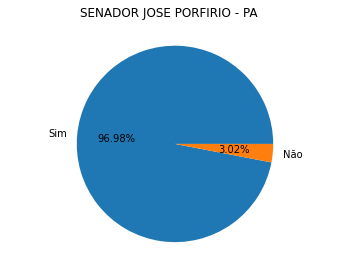

In [ ]:
# grafico de pizza município Top1 com maior % de vacinados que residem fora do município de vacinação
datax1 = vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[0,0])]['paciente_vacinado_mesma_UF'].value_counts().values
labels = ['Sim', 'Não']

# graficos
fig1, ax1 = plt.subplots()
ax1.pie(datax1, labels=labels, autopct='%1.2f%%')
ax1.axis('equal') # mantenha um circulo
fig1.suptitle(sr_top5_perc.iloc[0,1]+ " - "+ sr_top5_perc.iloc[0,2]);

In [ ]:
# Municipio Top2 percentualmente
vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[1,0])]['paciente_vacinado_mesma_UF'].value_counts()

1.0    5691
0.0     686
Name: paciente_vacinado_mesma_UF, dtype: int64

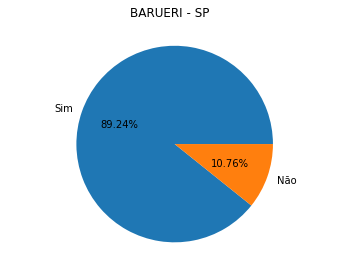

In [ ]:
# grafico de pizza município Top2 com maior % de vacinados que residem fora do município de vacinação
datax1 = vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[1,0])]['paciente_vacinado_mesma_UF'].value_counts().values
labels = ['Sim', 'Não']
# graficos
fig1, ax1 = plt.subplots()
ax1.pie(datax1, labels=labels, autopct='%1.2f%%')
ax1.axis('equal') # mantenha um circulo
fig1.suptitle(sr_top5_perc.iloc[1,1]+ " - "+ sr_top5_perc.iloc[1,2]);

In [ ]:
# Municipio Top3 percentualmente
vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[2,0])]['paciente_vacinado_mesma_UF'].value_counts()

1.0    3321
0.0     167
Name: paciente_vacinado_mesma_UF, dtype: int64

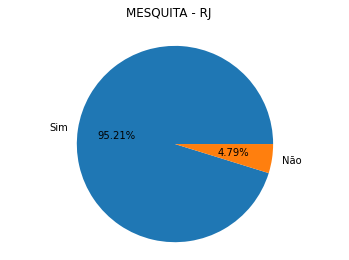

In [ ]:
# grafico de pizza município Top3 com maior % de vacinados que residem fora do município de vacinação
datax1 = vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[2,0])]['paciente_vacinado_mesma_UF'].value_counts().values
labels = ['Sim', 'Não']
# graficos
fig1, ax1 = plt.subplots()
ax1.pie(datax1, labels=labels, autopct='%1.2f%%')
ax1.axis('equal') # mantenha um circulo
fig1.suptitle(sr_top5_perc.iloc[2,1]+ " - "+ sr_top5_perc.iloc[2,2]);

In [ ]:
# Municipio Top4 percentualmente
vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[3,0])]['paciente_vacinado_mesma_UF'].value_counts()

1.0    220
0.0     13
Name: paciente_vacinado_mesma_UF, dtype: int64

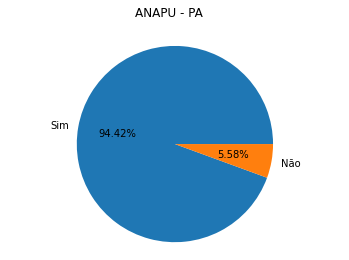

In [ ]:
# grafico de pizza município Top4 com maior % de vacinados que residem fora do município de vacinação
datax1 = vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[3,0])]['paciente_vacinado_mesma_UF'].value_counts().values
labels = ['Sim', 'Não']
# graficos
fig1, ax1 = plt.subplots()
ax1.pie(datax1, labels=labels, autopct='%1.2f%%')
ax1.axis('equal') # mantenha um circulo
fig1.suptitle(sr_top5_perc.iloc[3,1]+ " - "+ sr_top5_perc.iloc[3,2]);

In [ ]:
# Municipio Top5 percentualmente
vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[4,0])]['paciente_vacinado_mesma_UF'].value_counts()

1.0    2945
0.0      85
Name: paciente_vacinado_mesma_UF, dtype: int64

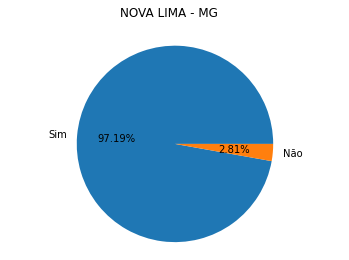

In [ ]:
# grafico de pizza município Top5 com maior % de vacinados que residem fora do município de vacinação
datax1 = vacinacao_mun_top5_perc.loc[(vacinacao_mun_top5_perc['estabelecimento_municipio_codigo'] == sr_top5_perc.iloc[4,0])]['paciente_vacinado_mesma_UF'].value_counts().values
labels = ['Sim', 'Não']
# graficos
fig1, ax1 = plt.subplots()
ax1.pie(datax1, labels=labels, autopct='%1.2f%%')
ax1.axis('equal') # mantenha um circulo
fig1.suptitle(sr_top5_perc.iloc[4,1]+ " - "+ sr_top5_perc.iloc[4,2]);

#### 4.9.3.2) Vacinados que residem fora do município de vacinação: quais as categorias de vacinados?

In [ ]:
# Análise da distribuição de categorias dos vacinados que residem fora do município de vacinação para o conjunto de municípios das regiões norte e sudeste

df_vacinacao.loc[(df_vacinacao['paciente_vacinado_fora_mun']==1)]['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             541232
Faixa Etária                                       156300
Povos Indígenas                                     16712
Pessoas de 60 anos ou mais institucionalizadas      13866
Pessoas com Deficiência                              1651
Povos e Comunidades Tradicionais                     1619
Forças de Segurança e Salvamento                      521
Comorbidades                                          142
Forças Armadas (membros ativos)                        61
Pessoas em Situação de Rua                             46
Funcionário do Sistema de Privação de Liberdade        42
Trabalhadores da Educação                              19
População Privada de Liberdade                         15
Trabalhadores Industriais                               5
Trabalhadores Portuários                                2
Name: vacina_categoria_nome, dtype: int64

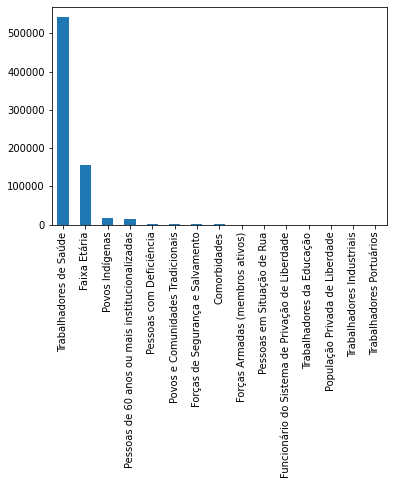

In [ ]:
df_vacinacao.loc[(df_vacinacao['paciente_vacinado_fora_mun']==1)]['vacina_categoria_nome'].value_counts().plot.bar()

Avaliação da categoria para cada município dos top 5 em percentuais de vacinado residentes em outro município

In [ ]:
mun_top5_perc_gr = vacinacao_mun_top5_perc.groupby(['estabelecimento_municipio_nome','estabelecimento_uf','vacina_categoria_nome'])['paciente_vacinado_fora_mun'].sum()
mun_top5_perc_gr

estabelecimento_municipio_nome  estabelecimento_uf  vacina_categoria_nome                         
ANAPU                           PA                  Comorbidades                                         1.0
                                                    Faixa Etária                                         8.0
                                                    Pessoas de 60 anos ou mais institucionalizadas       2.0
                                                    Povos Indígenas                                    179.0
                                                    Trabalhadores de Saúde                              38.0
BARUERI                         SP                  Faixa Etária                                      1177.0
                                                    Pessoas de 60 anos ou mais institucionalizadas       2.0
                                                    Povos e Comunidades Tradicionais                    11.0
                             

In [ ]:
# Redefinindo o indice do dataset, levando as colunas do indice multi-nivel para o dataframe

df_top5_perc_cat = mun_top5_perc_gr.reset_index()
df_top5_perc_cat

,estabelecimento_municipio_nome,estabelecimento_uf,vacina_categoria_nome,paciente_vacinado_fora_mun
0,ANAPU,PA,Comorbidades,1.0
1,ANAPU,PA,Faixa Etária,8.0
2,ANAPU,PA,Pessoas de 60 anos ou mais institucionalizadas,2.0
3,ANAPU,PA,Povos Indígenas,179.0
4,ANAPU,PA,Trabalhadores de Saúde,38.0
5,BARUERI,SP,Faixa Etária,1177.0
6,BARUERI,SP,Pessoas de 60 anos ou mais institucionalizadas,2.0
7,BARUERI,SP,Povos e Comunidades Tradicionais,11.0
8,BARUERI,SP,Trabalhadores de Saúde,5187.0
9,MESQUITA,RJ,Comorbidades,2.0


In [ ]:
# Podemos observar pelas listagens acima que algumas categorias tem um total de vacinados muito pequeno, abaixo de 15.
# Essas categorias, plotadas num gráfico, praticamente não sensibilizariam viasualmente o mesmo
# A fim de concentrar as análises nas principais categorias vacinadas nos municípios, os municípios com menos de 15 vacinados por categoria serão descartados da análise visual

df_top5_perc_cat_min15 = df_top5_perc_cat[(df_top5_perc_cat['paciente_vacinado_fora_mun'] > 15)]
df_top5_perc_cat_min15

,estabelecimento_municipio_nome,estabelecimento_uf,vacina_categoria_nome,paciente_vacinado_fora_mun
3,ANAPU,PA,Povos Indígenas,179.0
4,ANAPU,PA,Trabalhadores de Saúde,38.0
5,BARUERI,SP,Faixa Etária,1177.0
8,BARUERI,SP,Trabalhadores de Saúde,5187.0
10,MESQUITA,RJ,Faixa Etária,1473.0
12,MESQUITA,RJ,Pessoas com Deficiência,42.0
15,MESQUITA,RJ,Trabalhadores de Saúde,1102.0
16,NOVA LIMA,MG,Faixa Etária,108.0
19,NOVA LIMA,MG,Trabalhadores de Saúde,2912.0
21,SENADOR JOSE PORFIRIO,PA,Povos Indígenas,165.0


In [ ]:
#df_top5_perc_cat_min15.pivot_table(index='estabelecimento_municipio_nome', columns='vacina_categoria_nome', values = 'paciente_vacinado_fora_mun').plot(kind='bar')
#plt.xlabel('')
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.show() 

In [ ]:
df_pivot = df_top5_perc_cat_min15.pivot_table(index='estabelecimento_municipio_nome', columns='vacina_categoria_nome', values = 'paciente_vacinado_fora_mun')
df_pivot

vacina_categoria_nome,Faixa Etária,Pessoas com Deficiência,Povos Indígenas,Trabalhadores de Saúde
estabelecimento_municipio_nome,,,,
ANAPU,NaN,NaN,179.0,38.0
BARUERI,1177.0,NaN,NaN,5187.0
MESQUITA,1473.0,42.0,NaN,1102.0
NOVA LIMA,108.0,NaN,NaN,2912.0
SENADOR JOSE PORFIRIO,NaN,NaN,165.0,33.0


Text(0.5, 0.98, 'Vacinados não residentes nos municípios')

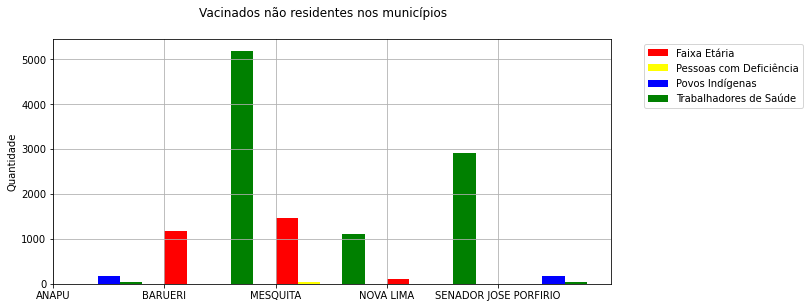

In [ ]:
# Gráfico 
val1 = df_pivot['Faixa Etária'].values
val2 = df_pivot['Pessoas com Deficiência'].values
val3 = df_pivot['Povos Indígenas'].values
val4 = df_pivot['Trabalhadores de Saúde'].values
labels= df_pivot.index
fig, ax = plt.subplots(figsize=(10, 4.5))
width = 0.2 # largura da barra
xlocs = np.arange(len(val1))
ax.bar(xlocs+width, val1, width, color='red', label='Faixa Etária')
ax.bar(xlocs+(2*width), val2, width, color='yellow', label='Pessoas com Deficiência')
ax.bar(xlocs+(3*width), val3, width, color='blue', label='Povos Indígenas')
ax.bar(xlocs+(4*width), val4, width, color='green', label='Trabalhadores de Saúde')

# labels, grids, titulos
#plt.style.use('seaborn-dark')
#ax.set_xticks(ticks=range(len(val1)))
ax.set_xticks(xlocs+width-0.1)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
#ax.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_ylabel('Quantidade')
fig.suptitle('Vacinados não residentes nos municípios')
#fig.tight_layout(pad=1)